![alttext](https://github.com/UrbsLab/STREAMLINE/blob/main/Pictures/STREAMLINE_LOGO.jpg?raw=true)

STREAMLINE is an end-to-end automated machine learning (AutoML) pipeline that empowers anyone to easily run, interpret, and apply a rigorous and customizable analysis for data mining or predictive modeling.

--------------

This notebook runs all aspects of the STREAMLINE which is an automated machine learning analysis pipeline for binary classification tasks. Of note, two potentially important elements that are not automated by this pipeline include careful data cleaning and feature engineering using problem domain knowledge. Please review the README included in the associated GitHub repository for a detailed about this pipeline.

This notebook is set up to run 'as-is' on a 'demo' dataset from the UCI repository (HCC dataset) using only three modeling algorithms (so that it runs in a matter of minutes). We analyze a copy of the dataset with and without covariate features to show how this pipline can be run on multiple datasets simultaneously (having the option to compare modeling on these different datasets in a later phase of the pipeline. Users will need to upload their own files and update pipeline run parameters below to ready the pipeline for their own needs. Suggested default run parameters suitible for most users are included, however file paths and names will need to be edited to run anything other than the 'demo' analysis.



# Setup

## Prerequisites and STREAMLINE
Setting up prerequisites and STREAMLINE

In [1]:
# !pip install -r requirements.txt

In [2]:
# !pip install --upgrade scipy>=1.8.0

## Notebook Housekeeping
Set up notebook cells to display internal process. 

Use logging.INFO for higher level output, logging.WARNING for only critical information. Comment to hide all text output.

You can use run_parallel=True for phases other than modeling, but the advantage is not significant vs the overhead for small jobs.

In [3]:
import logging
FORMAT = '%(levelname)s: %(message)s'
logging.basicConfig(format=FORMAT)
logger = logging.getLogger()
logger.setLevel(logging.INFO)

# STREAMLINE Workflow

## Mandatory Run Parameters for Pipeline

Preset for running the demonstration dataset, change accordingly for running on custom dataset.

In [4]:
# Target dataset folder path(must include one or more .txt or .csv datasets)
data_path = "./DemoData" # (str) Demontration Data Path Folder

# Output foder path: where to save pipeline outputs (must be updated for a given user)
output_path = './demo/' # (str) Demonstration Ouput Path Folder

# Unique experiment name - folder created for this analysis within output folder path
experiment_name = 'hcc_demo'  # (str) Demontration Experiment Name

# Data Labels
class_label = 'Class' # (str) i.e. class outcome column label
instance_label = 'InstanceID' # (str) If data includes instance labels, given respective column name here, otherwise put 'None'

# Option to manually specify feature names to leave out of analysis, or which to treat as categorical (without using built in variable type detector)
ignore_features = None # list of column names (given as string values) to exclude from the analysis (only insert column names if needed, otherwise leave empty)
categorical_feature_headers = None # empty list for 'auto-detect' otherwise list feature names (given as string values) to be treated as categorical. Only impacts algorithms that can take variable type into account.

Housekeeping code for error reduction and functionality.

In [5]:
import os
import shutil
if os.path.exists(output_path):
    shutil.rmtree(output_path)

## Phase 1: Exploratory Analysis

In [6]:
n_splits = 3  # (int, > 1) Number of training/testing data partitions to create - and resulting number of models generated using each ML algorithm
partition_method = 'Stratified' # (str) for Stratified, Random, or Group, respectively
match_label = None # (str or None) Only applies when M selected for partition-method; indicates column label with matched instance ids' 
categorical_cutoff = 10 # (int) Bumber of unique values after which a variable is considered to be quantitative vs categorical
sig_cutoff = 0.05 # (float, 0-1) Significance cutoff used throughout pipeline
missingness_percentage = 0.3 # (float, 0-1) Percentage of missing after which categorical featrure identifier is generated.
# list of names of analysis to do while doing EDA
exploration_list = ["Describe", "Univariate Analysis", "Feature Correlation"]
# list of analysis plots to save in experiment directory
plot_list = ["Describe", "Univariate Analysis", "Feature Correlation"]
# feature correlation analysis (yields correlation heatmap)
# univariate analysis plots (note: univariate analysis still output by default)
top_features = 20 # (int) Number of top features to report in notebook for univariate analysis
random_state = 42 # (int) Sets a specific random seed for reproducible results

INFO: NumExpr defaulting to 8 threads.
INFO: Loading Dataset: hcc-data_example
INFO: Loading Dataset: hcc-data_example
INFO: Running Feature Engineering
INFO: Identifying Feature Types...
INFO: Identifying Feature Types...
INFO: Running Basic Exploratory Analysis...
INFO: Data Counts: ----------------
INFO: Instance Count = 165
INFO: Feature Count = 54
INFO:     Categorical  = 32
INFO:     Quantitative = 22
INFO: Missing Count = 826
INFO:     Missing Percent = 0.09270482603815937
INFO: Class Counts: ----------------
INFO: Class Count Information0    102
1     63
Name: Class, dtype: int64


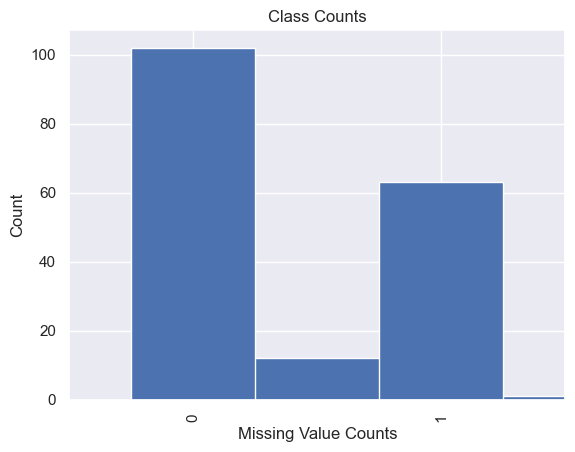

INFO: Generating Feature Correlation Heatmap...


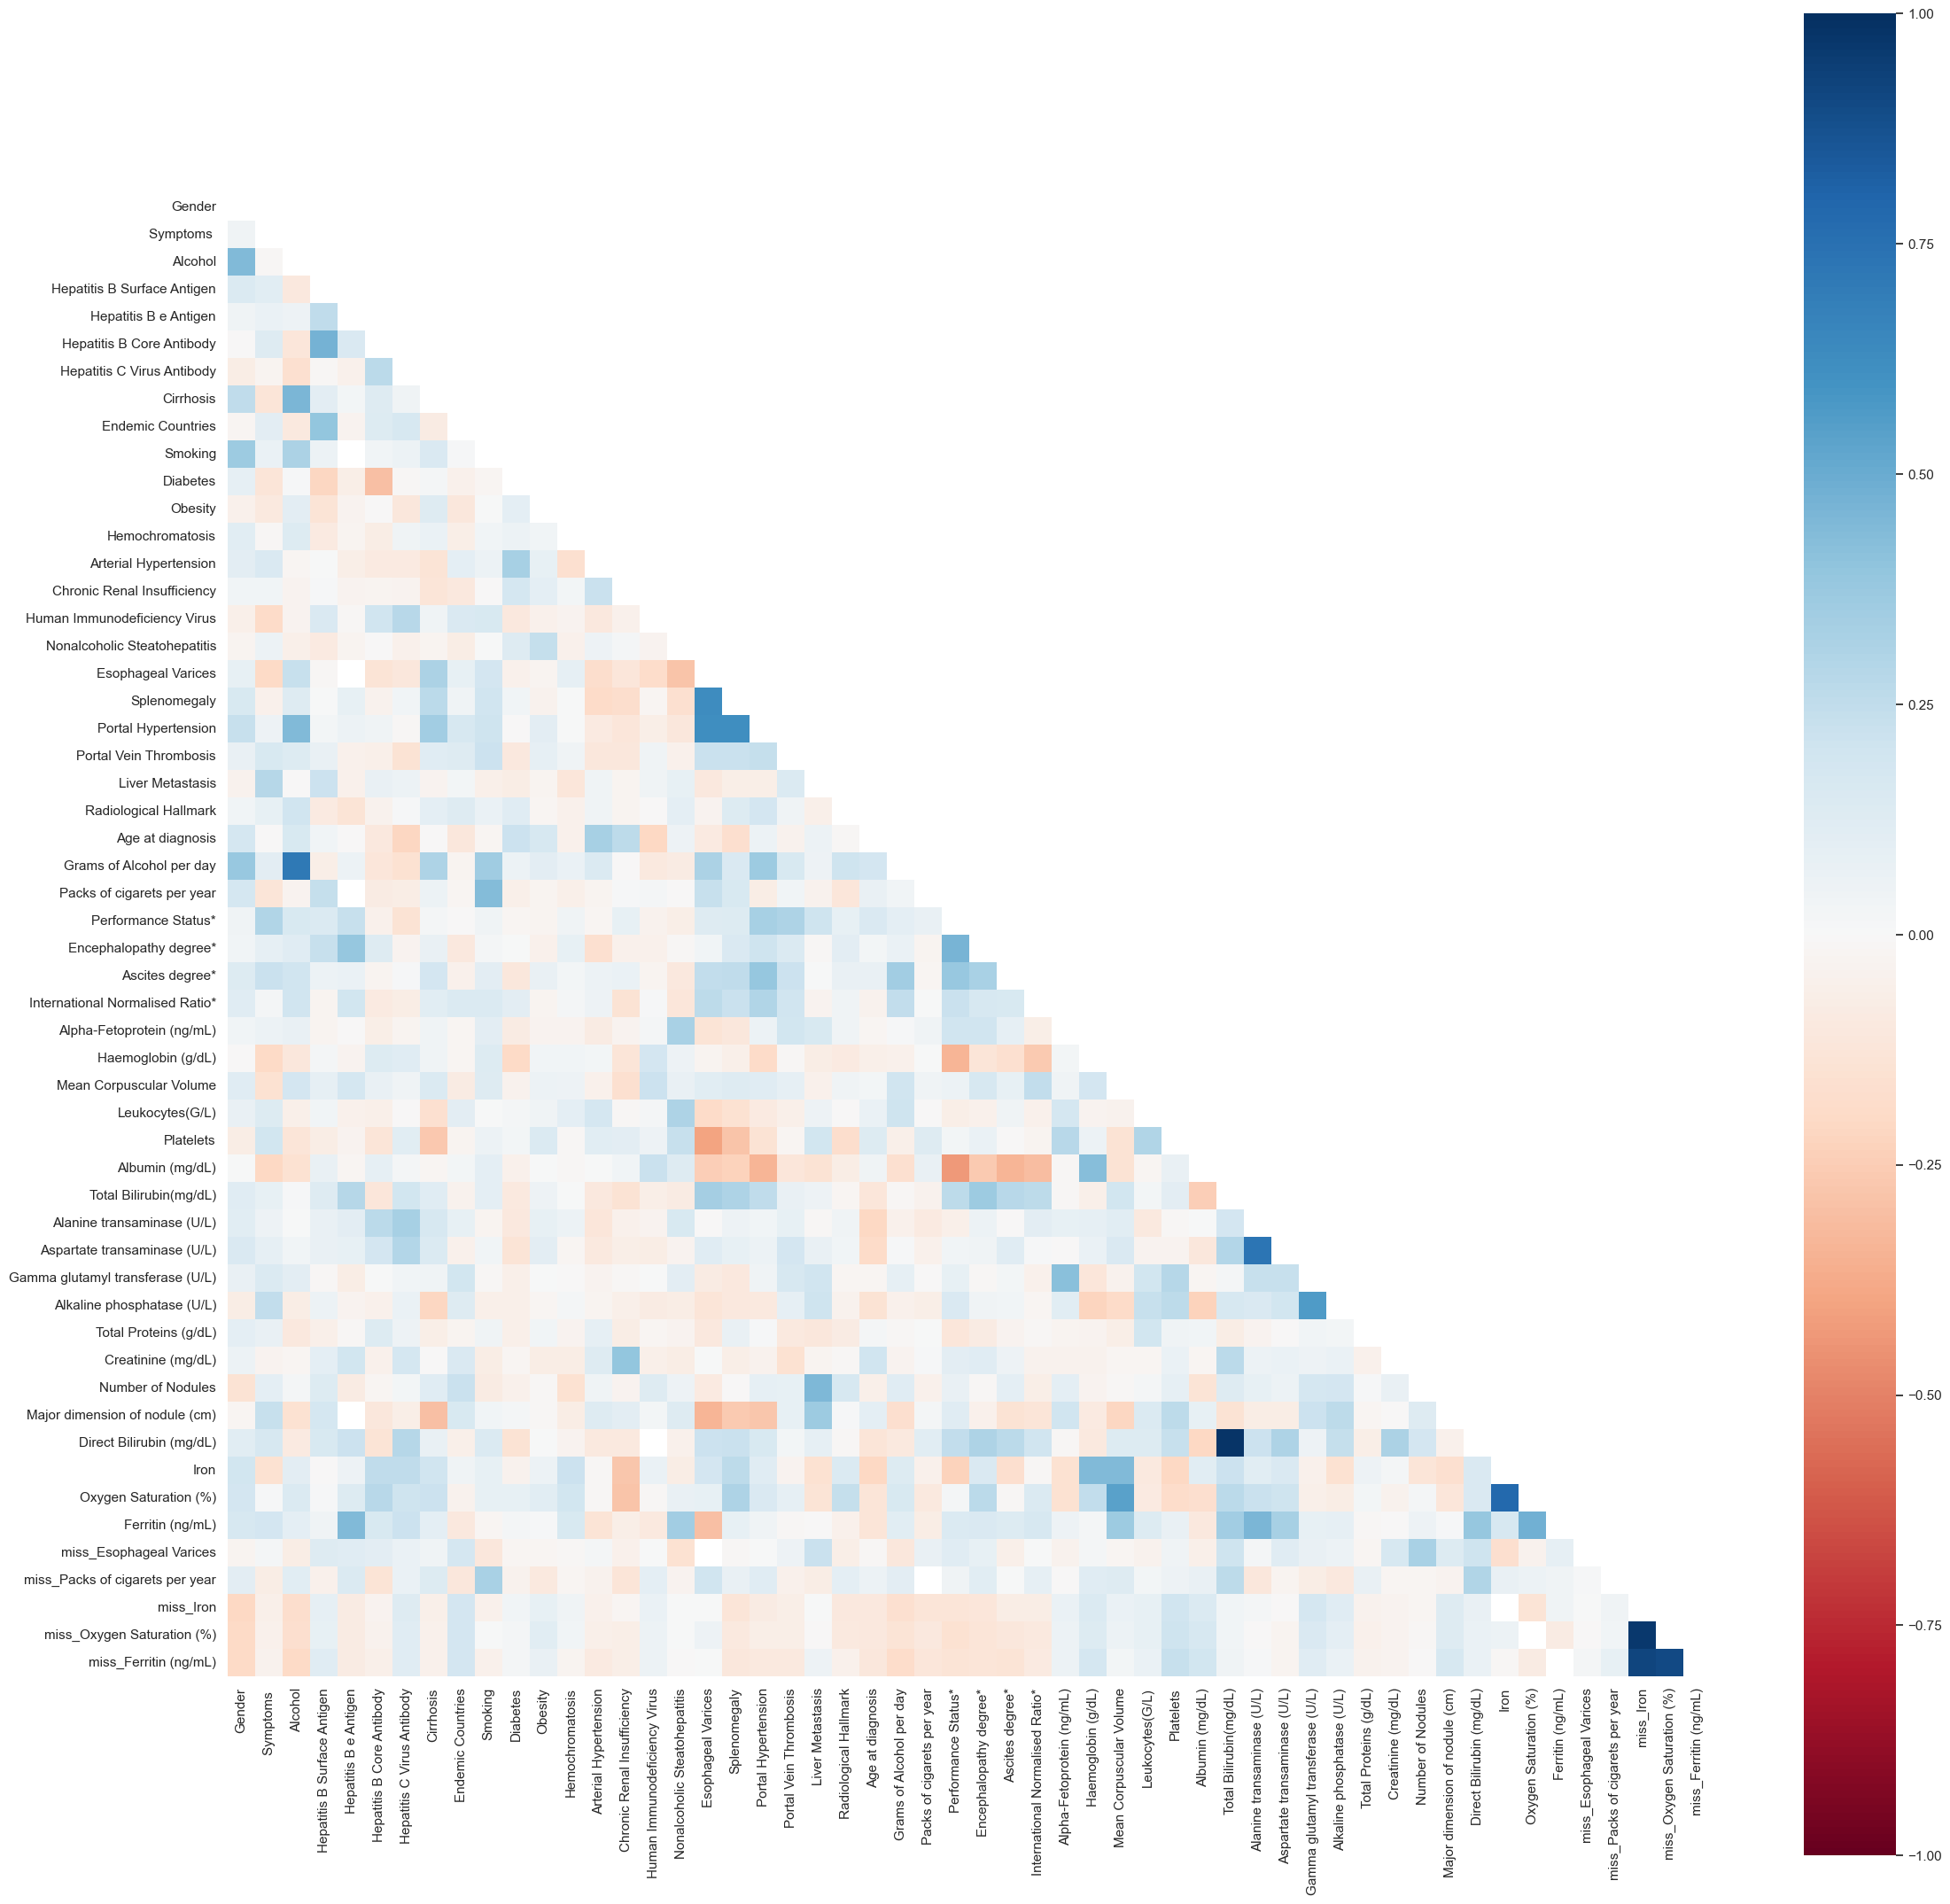

INFO: Running Univariate Analyses...
INFO: Plotting top significant 20 features.
INFO: ###################################################
INFO: Significant Univariate Associations:
INFO: Alkaline phosphatase (U/L): (p-val = 8.425494437393163e-07)
INFO: Alpha-Fetoprotein (ng/mL): (p-val = 3.7632257667465082e-06)
INFO: Performance Status*: (p-val = 3.2548676278782114e-05)
INFO: Haemoglobin (g/dL): (p-val = 6.806983230077955e-05)
INFO: Albumin (mg/dL): (p-val = 0.0002097286566980117)
INFO: Symptoms : (p-val = 0.0006092985105592953)
INFO: Direct Bilirubin (mg/dL): (p-val = 0.0013544764761447027)
INFO: Aspartate transaminase (U/L): (p-val = 0.0016188344745582482)
INFO: Ferritin (ng/mL): (p-val = 0.0019988859548087426)
INFO: Liver Metastasis: (p-val = 0.002993588224869906)
INFO: Ascites degree*: (p-val = 0.0038134308539161175)
INFO: miss_Esophageal Varices: (p-val = 0.008363108983782761)
INFO: Iron: (p-val = 0.009131914019954513)
INFO: Portal Vein Thrombosis: (p-val = 0.01174304115542567)
I

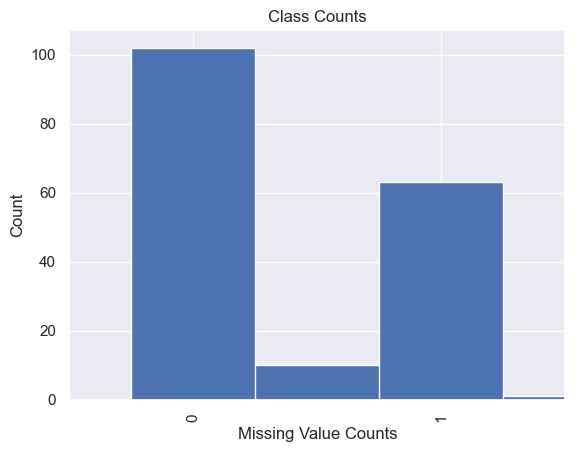

INFO: Generating Feature Correlation Heatmap...


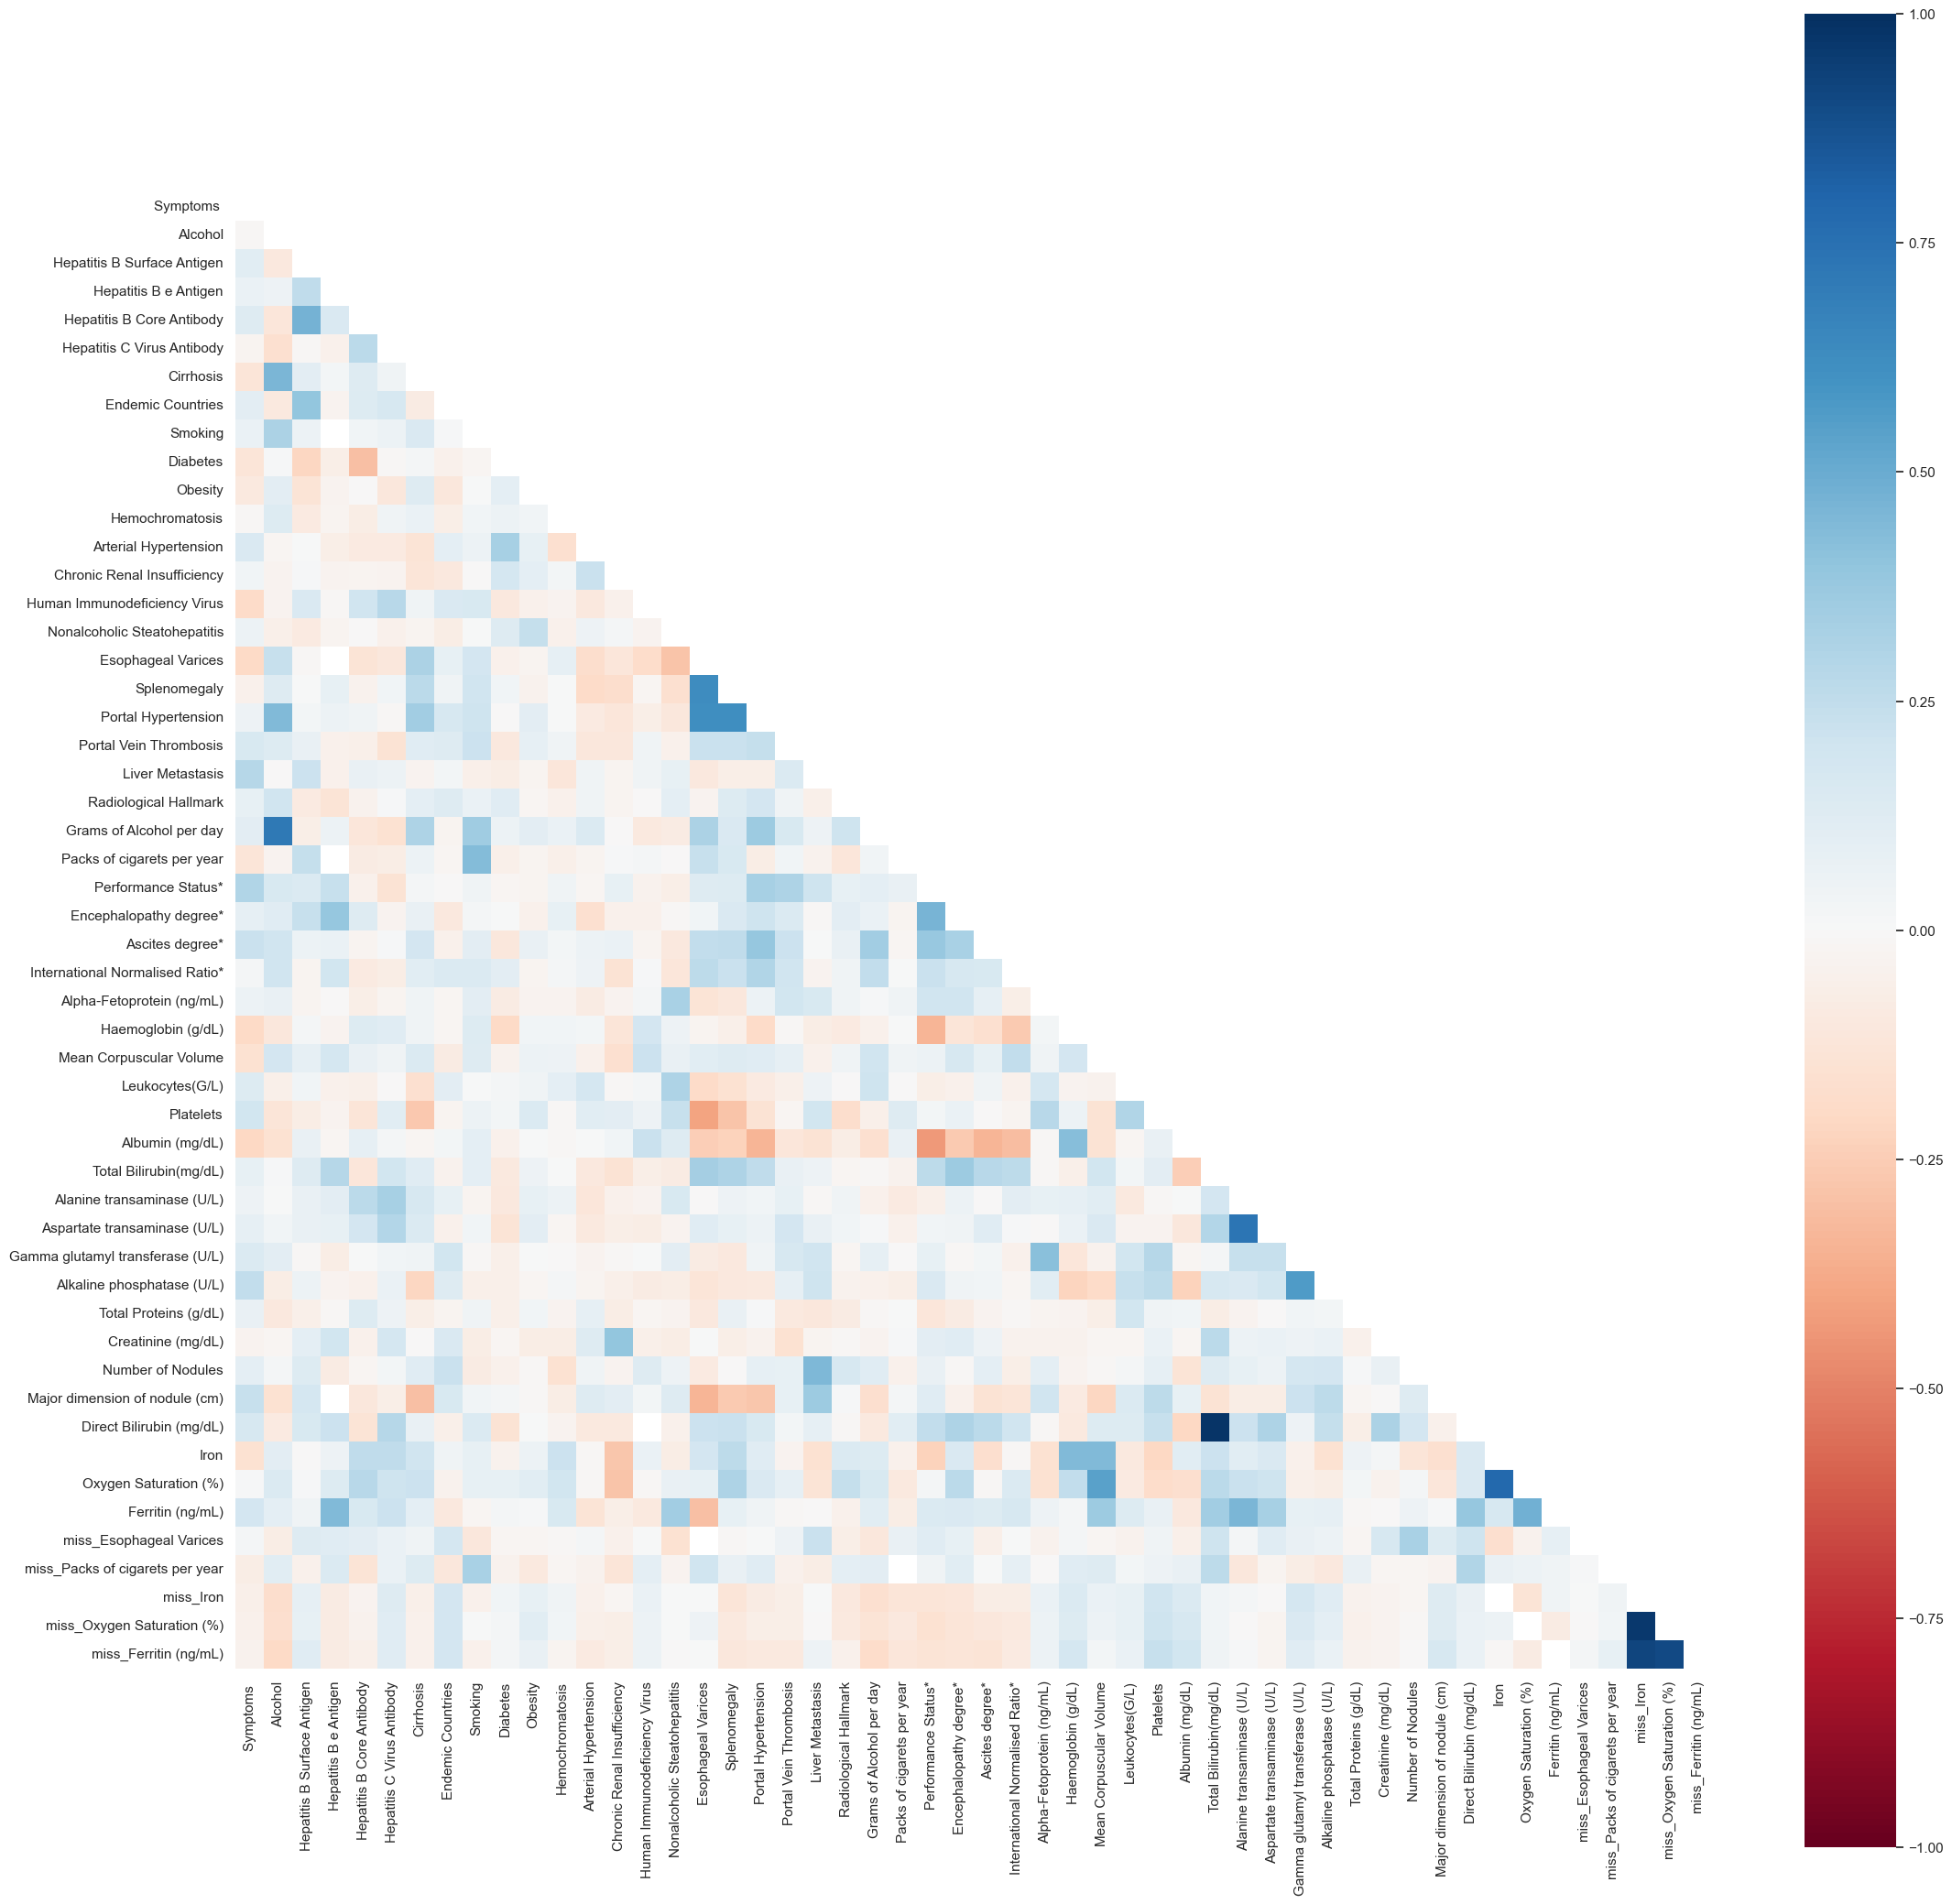

INFO: Running Univariate Analyses...
INFO: Plotting top significant 20 features.
INFO: ###################################################
INFO: Significant Univariate Associations:
INFO: Alkaline phosphatase (U/L): (p-val = 8.425494437393163e-07)
INFO: Alpha-Fetoprotein (ng/mL): (p-val = 3.7632257667465082e-06)
INFO: Performance Status*: (p-val = 3.2548676278782114e-05)
INFO: Haemoglobin (g/dL): (p-val = 6.806983230077955e-05)
INFO: Albumin (mg/dL): (p-val = 0.0002097286566980117)
INFO: Symptoms : (p-val = 0.0006092985105592953)
INFO: Direct Bilirubin (mg/dL): (p-val = 0.0013544764761447027)
INFO: Aspartate transaminase (U/L): (p-val = 0.0016188344745582482)
INFO: Ferritin (ng/mL): (p-val = 0.0019988859548087426)
INFO: Liver Metastasis: (p-val = 0.002993588224869906)
INFO: Ascites degree*: (p-val = 0.0038134308539161175)
INFO: miss_Esophageal Varices: (p-val = 0.008363108983782761)
INFO: Iron: (p-val = 0.009131914019954513)
INFO: Portal Vein Thrombosis: (p-val = 0.01174304115542567)
I

In [7]:
from streamline.runners.eda_runner import EDARunner
eda = EDARunner(data_path, output_path, experiment_name, 
                exploration_list=exploration_list, plot_list=plot_list,
                class_label=class_label, instance_label=instance_label, 
                match_label=match_label, n_splits=n_splits, 
                partition_method=partition_method,
                ignore_features=ignore_features, 
                categorical_features=categorical_feature_headers, 
                top_features=top_features,
                categorical_cutoff=categorical_cutoff, sig_cutoff=sig_cutoff,
                missingness_percentage=missingness_percentage,
                random_state=random_state, show_plots=True)
eda.run(run_parallel=False)

## Phase 2: Data Preprocessing

In [8]:
scale_data = True # (bool, True or False) Perform data scaling?
impute_data = True # (bool, True or False) Perform missing value data imputation? (required for most ML algorithms if missing data is present)
overwrite_cv = True # (bool, True or False) Overwrites earlier cv datasets with new scaled/imputed ones
multi_impute = True # (bool, True or False) Applies multivariate imputation to quantitative features, otherwise uses mean imputation

In [9]:
from streamline.runners.dataprocess_runner import DataProcessRunner
dpr = DataProcessRunner(output_path, experiment_name, 
                        scale_data=scale_data, impute_data=impute_data,
                        multi_impute=multi_impute, overwrite_cv=overwrite_cv, 
                        class_label=class_label, instance_label=instance_label, 
                        random_state=random_state)
dpr.run(run_parallel=False)

INFO: Preparing Train and Test for: hcc-data_example_CV_1
INFO: Imputing Missing Values...
INFO: Scaling Data Values...
INFO: Saving Processed Train and Test Data...
INFO: hcc-data_example Phase 2 complete
INFO: Preparing Train and Test for: hcc-data_example_CV_0
INFO: Imputing Missing Values...
INFO: Scaling Data Values...
INFO: Saving Processed Train and Test Data...
INFO: hcc-data_example Phase 2 complete
INFO: Preparing Train and Test for: hcc-data_example_CV_2
INFO: Imputing Missing Values...
INFO: Scaling Data Values...
INFO: Saving Processed Train and Test Data...
INFO: hcc-data_example Phase 2 complete
INFO: Preparing Train and Test for: hcc-data_example_no_covariates_CV_1
INFO: Imputing Missing Values...
INFO: Scaling Data Values...
INFO: Saving Processed Train and Test Data...
INFO: hcc-data_example_no_covariates Phase 2 complete
INFO: Preparing Train and Test for: hcc-data_example_no_covariates_CV_0
INFO: Imputing Missing Values...
INFO: Scaling Data Values...
INFO: Saving P

## Phase 3: Feature Importance Evaluation

In [10]:
do_mutual_info = True # (bool, True or False) Do mutual information analysis
do_multisurf = True # (bool, True or False) Do multiSURF analysis
feat_algorithms = []
if do_mutual_info:
    feat_algorithms.append("MI")
if do_multisurf:
    feat_algorithms.append("MS")
use_TURF = False # (bool, True or False) Use TURF wrapper around MultiSURF
TURF_pct = 0.5 # (float, 0.01-0.5) Proportion of instances removed in an iteration (also dictates number of iterations)
njobs = -1 # (int) Number of cores dedicated to running algorithm; setting to -1 will use all available cores
instance_subset = 2000 # (int) Sample subset size to use with multiSURF

In [11]:
from streamline.runners.feature_runner import FeatureImportanceRunner
f_imp = FeatureImportanceRunner(output_path, experiment_name, 
                                class_label=class_label, 
                                instance_label=instance_label,
                                instance_subset=instance_subset, 
                                algorithms=feat_algorithms, 
                                use_turf=use_TURF, turf_pct=TURF_pct, 
                                random_state=random_state)
f_imp.run(run_parallel=False)

INFO: Loading Dataset: hcc-data_example_CV_1_Train
INFO: Prepared Train and Test for: hcc-data_example_CV_1
INFO: Running Mutual Information...
INFO: Sort and pickle feature importance scores...
INFO: hcc-data_example CV1 phase 3 mutual_information evaluation complete
INFO: Loading Dataset: hcc-data_example_CV_0_Train
INFO: Prepared Train and Test for: hcc-data_example_CV_0
INFO: Running Mutual Information...
INFO: Sort and pickle feature importance scores...
INFO: hcc-data_example CV0 phase 3 mutual_information evaluation complete
INFO: Loading Dataset: hcc-data_example_CV_2_Train
INFO: Prepared Train and Test for: hcc-data_example_CV_2
INFO: Running Mutual Information...
INFO: Sort and pickle feature importance scores...
INFO: hcc-data_example CV2 phase 3 mutual_information evaluation complete
INFO: Loading Dataset: hcc-data_example_CV_1_Train
INFO: Prepared Train and Test for: hcc-data_example_CV_1
INFO: Running MultiSURF...
INFO: Sort and pickle feature importance scores...
INFO: h

## Phase 4: Feature Selection

In [12]:
max_features_to_keep = 2000 # (int) Maximum features to keep. 'None' if no max
filter_poor_features = True # (bool, True or False) Filter out the worst performing features prior to modeling
top_features = 40 # (int) Number of top features to illustrate in figures
export_scores = True # (bool, True or False) Export figure summarizing average feature importance scores over cv partitions

INFO: Plotting Feature Importance Scores...
INFO:                            Feature  Importance
30       Alpha-Fetoprotein (ng/mL)    0.125221
26             Performance Status*    0.107915
40      Alkaline phosphatase (U/L)    0.080217
31              Haemoglobin (g/dL)    0.069542
48                Ferritin (ng/mL)    0.069531
51                       miss_Iron    0.068348
44  Major dimension of nodule (cm)    0.063579
35                 Albumin (mg/dL)    0.062261
23                Age at diagnosis    0.055080
0                           Gender    0.050701
INFO: Saved Feature Importance Plots at
INFO: ./demo//hcc_demo/hcc-data_example/feature_selection/mutual_information/TopAverageScores.png


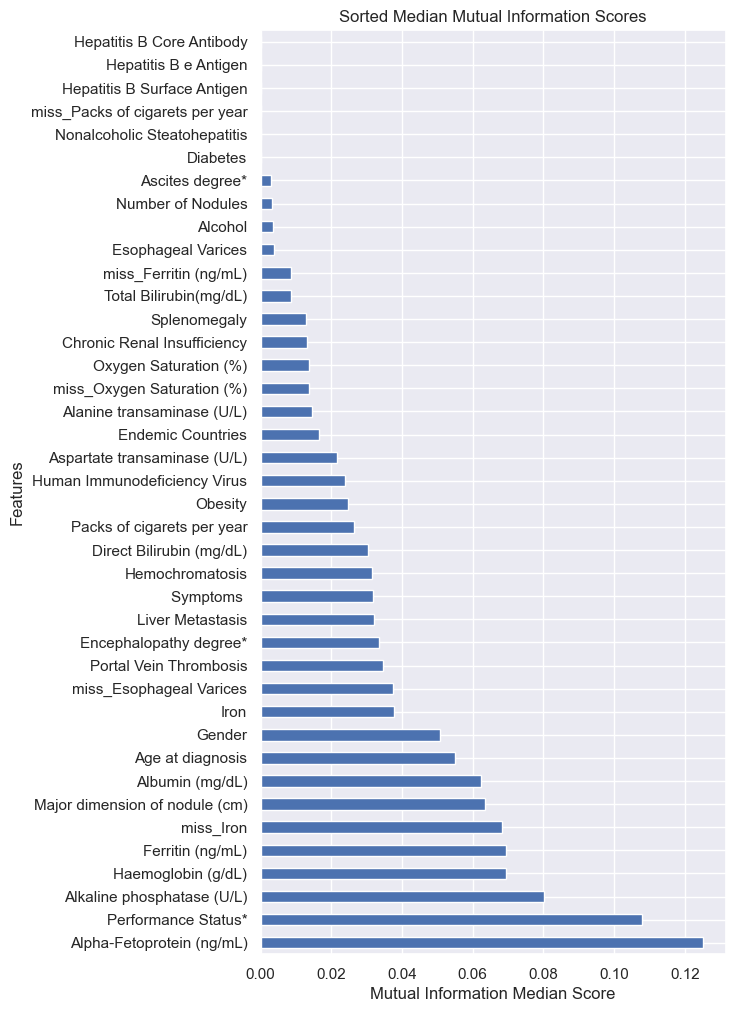

INFO:                              Feature  Importance
40        Alkaline phosphatase (U/L)    0.086969
31                Haemoglobin (g/dL)    0.084261
28                   Ascites degree*    0.081535
49           miss_Esophageal Varices    0.069718
21                  Liver Metastasis    0.058864
26               Performance Status*    0.058061
35                   Albumin (mg/dL)    0.052257
47             Oxygen Saturation (%)    0.047452
39  Gamma glutamyl transferase (U/L)    0.041394
46                              Iron    0.038138
INFO: Saved Feature Importance Plots at
INFO: ./demo//hcc_demo/hcc-data_example/feature_selection/multisurf/TopAverageScores.png


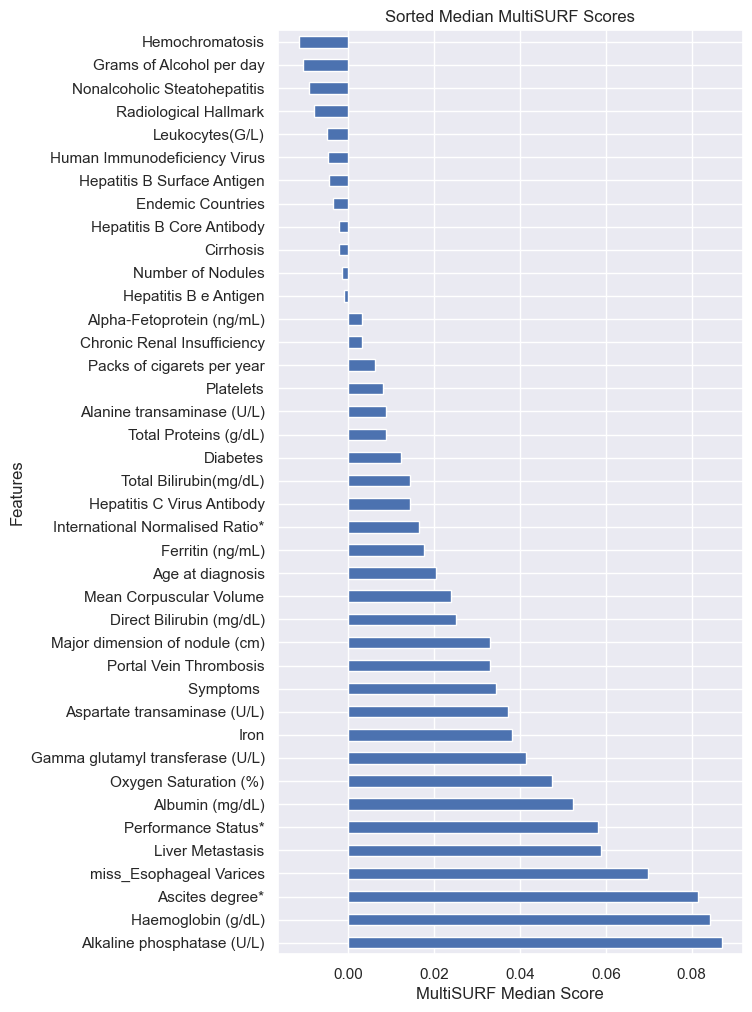

INFO: Applying collective feature selection...
INFO: hcc-data_example Phase 4 Complete
INFO: Plotting Feature Importance Scores...
INFO:                             Feature  Importance
28        Alpha-Fetoprotein (ng/mL)    0.117320
24              Performance Status*    0.097887
44                             Iron    0.088051
38       Alkaline phosphatase (U/L)    0.080929
29               Haemoglobin (g/dL)    0.077504
46                 Ferritin (ng/mL)    0.074834
48  miss_Packs of cigarets per year    0.065380
20                 Liver Metastasis    0.052302
42   Major dimension of nodule (cm)    0.051949
3             Hepatitis B e Antigen    0.032952
INFO: Saved Feature Importance Plots at
INFO: ./demo//hcc_demo/hcc-data_example_no_covariates/feature_selection/mutual_information/TopAverageScores.png


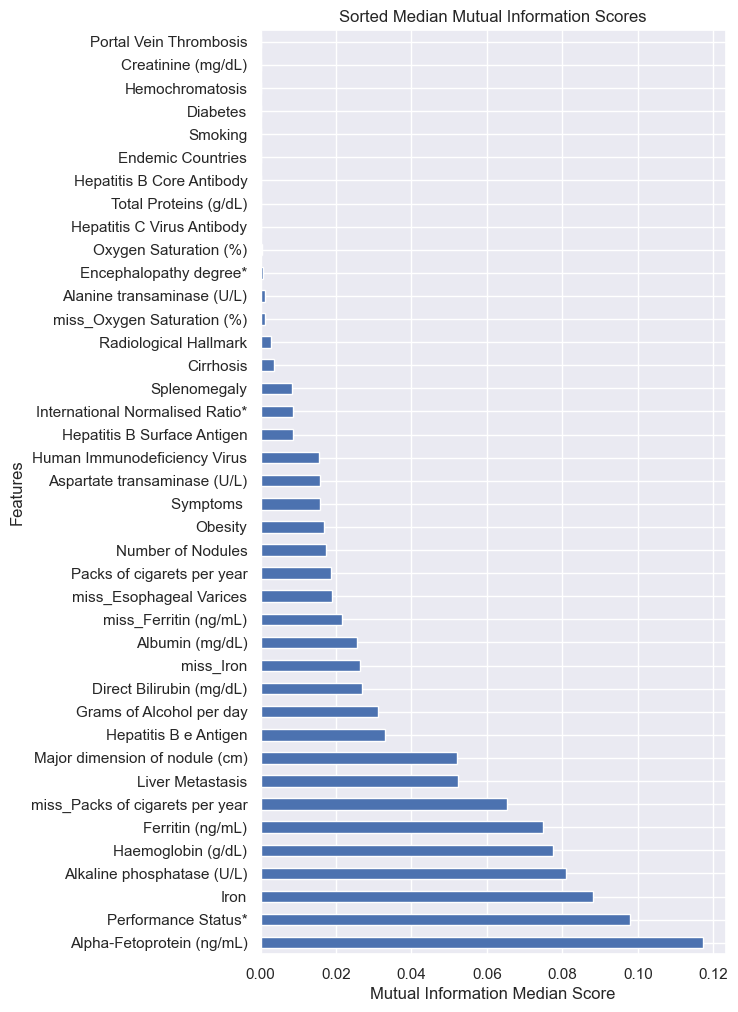

INFO:                              Feature  Importance
38        Alkaline phosphatase (U/L)    0.089019
26                   Ascites degree*    0.079327
29                Haemoglobin (g/dL)    0.072912
47           miss_Esophageal Varices    0.066039
20                  Liver Metastasis    0.064757
33                   Albumin (mg/dL)    0.059107
24               Performance Status*    0.057853
45             Oxygen Saturation (%)    0.045434
42    Major dimension of nodule (cm)    0.041057
37  Gamma glutamyl transferase (U/L)    0.036976
INFO: Saved Feature Importance Plots at
INFO: ./demo//hcc_demo/hcc-data_example_no_covariates/feature_selection/multisurf/TopAverageScores.png


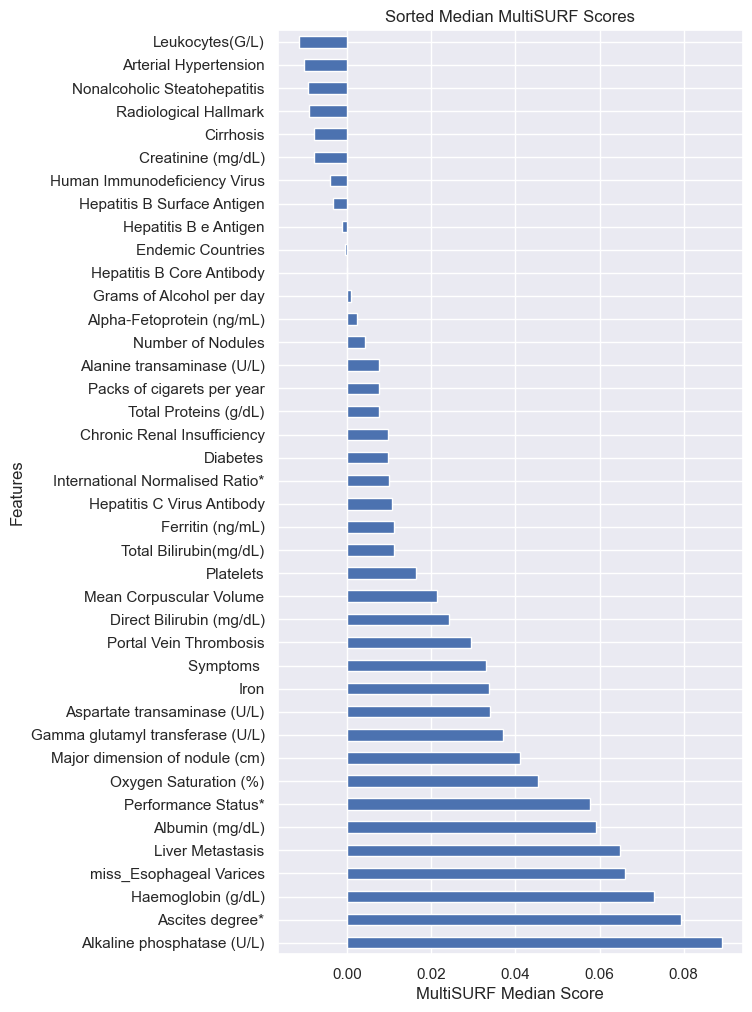

INFO: Applying collective feature selection...
INFO: hcc-data_example_no_covariates Phase 4 Complete


In [13]:
from streamline.runners.feature_runner import FeatureSelectionRunner
f_sel = FeatureSelectionRunner(output_path, experiment_name, 
                               feat_algorithms, class_label=class_label, 
                               instance_label=instance_label,
                               max_features_to_keep=max_features_to_keep, 
                               filter_poor_features=filter_poor_features, 
                               top_features=top_features, 
                               export_scores=export_scores,
                               overwrite_cv=overwrite_cv, 
                               random_state=random_state,
                               show_plots=True)
f_sel.run(run_parallel=False)

## Phase 5: Modeling

In [14]:
# Machine Learning Algorithms to Run, can be change by the user.
algorithms = ["NB", "LR", "DT"]
# ML Model Algorithm to exclude
exclude = ['eLCS', 'XCS', 'ExSTraCS']

# Other Analysis Parameters
training_subsample = 0  # (int) For long running algorithms, option to subsample training set (0 for no subsample) Limit Sample Size Used to train algorithms that do not scale up well in large instance spaces (i.e. XGB,SVM,KN,ANN,and LR to a lesser degree) and depending on 'instances' settings, ExSTraCS, eLCS, and XCS)
use_uniform_FI = True # (bool, True or False) Overides use of any available feature importances estimate methods from models, instead using permutation_importance uniformly
primary_metric = 'balanced_accuracy' # (str) Must be an available metric identifier from (https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
metric_direction = 'maximize' # (str, either of 'maximize' or 'minimize')
training_subsample=0   # training_subsample: for long running algos (XGB,SVM,ANN,KNN), option to subsample training set \ (0 for no subsample)

# Hyperparameter Sweep Options
n_trials = 200   # (int or None) Number of bayesian hyperparameter optimization trials using optuna
timeout = 900    # (int or None) Seconds until hyperparameter sweep stops running new trials (Note: it may run longer to finish last trial started)
export_hyper_sweep_plots = True # (bool, True or False) Export hyper parameter sweep plots from optuna

# Learning classifier system specific options (ExSTraCS, eLCS, XCS)
do_lcs_sweep = False # (bool, True or False) Do LCS hyperparam tuning or use below params
lcs_nu = 1                 # (int, 0-10) Fixed LCS nu param
lcs_iterations = 200000    # (int, > data sample size) Fixed LCS # learning iterations param
lcs_N = 2000               # (int) > 500) Fixed LCS rule population maximum size param
lcs_timeout = 1200     # (int) Seconds until hyperparameter sweep stops for LCS algorithms (evolutionary algorithms often require more time for a single run)


In [15]:
from streamline.runners.model_runner import ModelExperimentRunner
model_exp = ModelExperimentRunner(
                output_path, experiment_name, algorithms=algorithms, 
                exclude=exclude, class_label=class_label,
                instance_label=instance_label, scoring_metric=primary_metric, 
                metric_direction=metric_direction,
                training_subsample=training_subsample, 
                use_uniform_fi=use_uniform_FI, n_trials=n_trials,
                timeout=timeout, save_plots=False, 
                do_lcs_sweep=do_lcs_sweep, lcs_nu=lcs_nu, lcs_n=lcs_N, 
                lcs_iterations=lcs_iterations,
                lcs_timeout=lcs_timeout, resubmit=False)
model_exp.run(run_parallel=True)

100%|███████████████████████████████████████████| 18/18 [00:03<00:00,  5.57it/s]


## Phase 5 (Optional/Advanced): Feeding Custom Models

In [16]:
#@title Custom Model Example

from abc import ABC
from streamline.modeling.basemodel import BaseModel
from sklearn.linear_model import SGDClassifier as SGD


class ElasticNetClassifier(BaseModel, ABC):
    model_name = "Elastic Net"
    small_name = "EN"
    color = "aquamarine"

    def __init__(self, cv_folds=3, scoring_metric='balanced_accuracy',
                 metric_direction='maximize', random_state=None, cv=None, n_jobs=None):
        super().__init__(SGD, "Elastic Net", cv_folds, scoring_metric, metric_direction, random_state, cv)
        self.param_grid = {'penalty': ['elasticnet'], 'loss': ['log_loss', 'modified_huber'], 'alpha': [0.04, 0.05],
                           'max_iter': [1000, 2000], 'l1_ratio': [0.001, 0.1], 'class_weight': [None, 'balanced'],
                           'random_state': [random_state, ]}
        self.small_name = "EN"
        self.color = "aquamarine"
        self.n_jobs = n_jobs

    def objective(self, trial, params=None):
        self.params = {'penalty': trial.suggest_categorical('penalty', self.param_grid['penalty']),
                       'loss': trial.suggest_categorical('loss', self.param_grid['loss']),
                       'alpha': trial.suggest_float('alpha', self.param_grid['alpha'][0],
                                                    self.param_grid['l1_ratio'][1]),
                       'max_iter': trial.suggest_int('max_iter', self.param_grid['max_iter'][0],
                                                     self.param_grid['max_iter'][1]),
                       'l1_ratio': trial.suggest_float('l1_ratio', self.param_grid['l1_ratio'][0],
                                                       self.param_grid['l1_ratio'][1]),
                       'class_weight': trial.suggest_categorical('class_weight', self.param_grid['class_weight']),
                       'random_state': trial.suggest_categorical('random_state', self.param_grid['random_state'])}

        mean_cv_score = self.hyper_eval()
        return mean_cv_score

In [17]:
import time
import optuna
from streamline.modeling.modeljob import ModelJob
from streamline.models.decision_tree import DecisionTreeClassifier

model = ElasticNetClassifier()
start = time.time()
n_splits = 3

logging.warning("Running " + model.small_name + " Model Optimization")

optuna.logging.set_verbosity(optuna.logging.WARNING)
for i in range(n_splits):
    model_job = ModelJob(output_path + '/' + experiment_name + '/hcc-data_example', output_path, experiment_name, i,
                         class_label=class_label, instance_label=instance_label)
    model_job.run(model)
    logging.warning("Best Params:" + str(model.params))
logging.warning(model.small_name + " Optimization Step, Time running" + "" + ": " + str(time.time() - start))

INFO: Running EN on ./demo//hcc_demo/hcc-data_example/CVDatasets/hcc-data_example_CV_0_Train.csv
INFO: Best trial:
INFO:   Value: 0.7963485789572746
INFO:   Params: 
INFO:     penalty: elasticnet
INFO:     loss: log_loss
INFO:     alpha: 0.07612110060404978
INFO:     max_iter: 1080
INFO:     l1_ratio: 0.02738155067249148
INFO:     class_weight: balanced
INFO:     random_state: None
INFO: hcc-data_example [CV_0] (EN) training complete. ------------------------------------
INFO: Running EN on ./demo//hcc_demo/hcc-data_example/CVDatasets/hcc-data_example_CV_1_Train.csv
INFO: Best trial:
INFO:   Value: 0.8049124788255223
INFO:   Params: 
INFO:     penalty: elasticnet
INFO:     loss: modified_huber
INFO:     alpha: 0.04488879452069529
INFO:     max_iter: 1463
INFO:     l1_ratio: 0.04932720340567714
INFO:     class_weight: balanced
INFO:     random_state: None
INFO: hcc-data_example [CV_1] (EN) training complete. ------------------------------------
INFO: Running EN on ./demo//hcc_demo/hcc-d

## Phase 6: Statistics Summary and Figure Generation

In [18]:
plot_ROC = True    # (bool, True or False) Plot ROC curves individually for each algorithm including all CV results and averages
plot_PRC = True    # (bool, True or False) Plot PRC curves individually for each algorithm including all CV results and averages
plot_FI_box = True # (bool, True or False) Plot box plot summaries comparing algorithms for each metric
plot_metric_boxplots = True # (bool, True or False) Plot feature importance boxplots for each algorithm
metric_weight = 'balanced_accuracy' # (str, balanced_accuracy or roc_auc) ML model metric used as weight in composite FI plots (only supports balanced_accuracy or roc_auc as options) Recommend setting the same as primary_metric if possible.
top_model_features = 40  # (int) Number of top features in model to illustrate in figures

INFO: Running Statistics Summary for hcc-data_example
INFO: Running stats on Naive Bayes


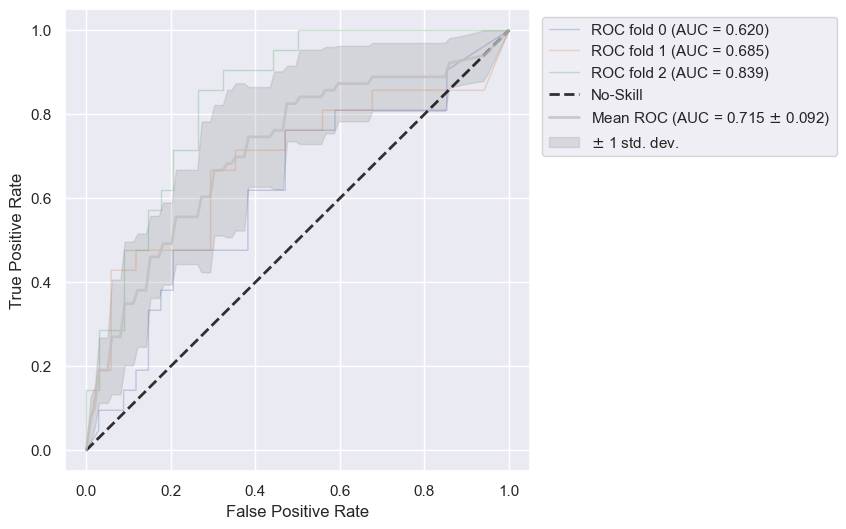

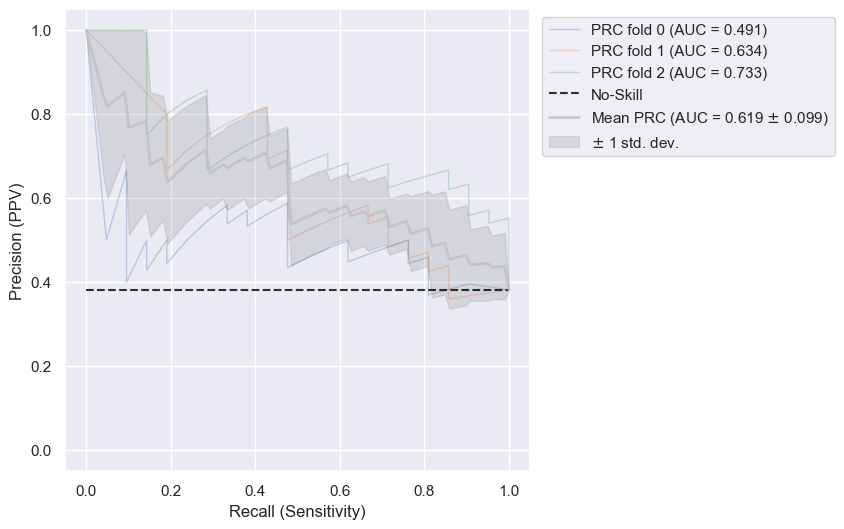

INFO: Running stats on Logistic Regression


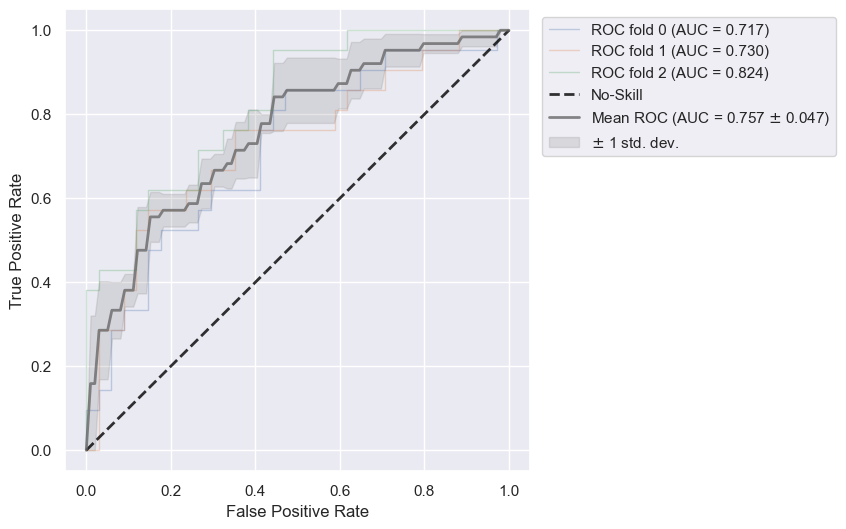

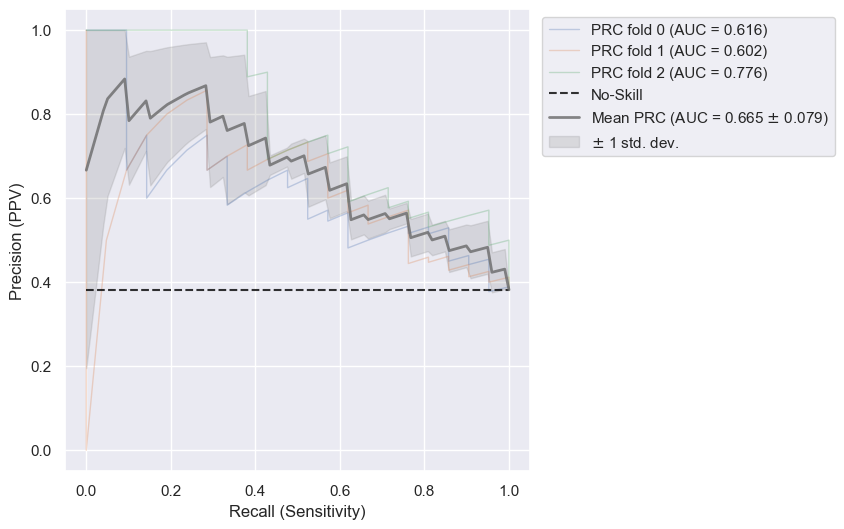

INFO: Running stats on Decision Tree


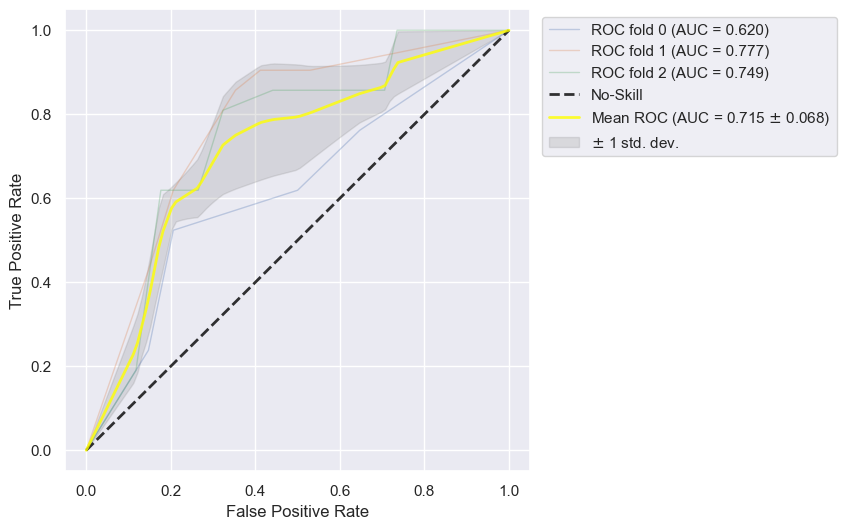

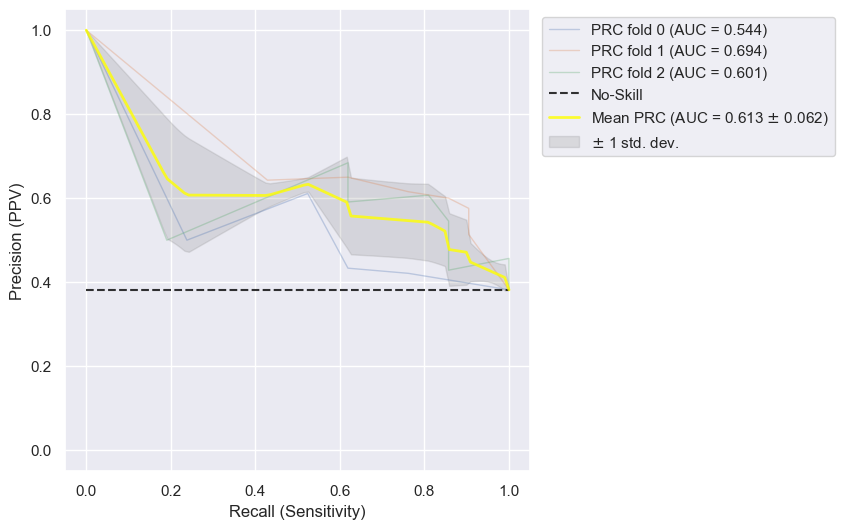

INFO: Generating ROC and PRC plots...


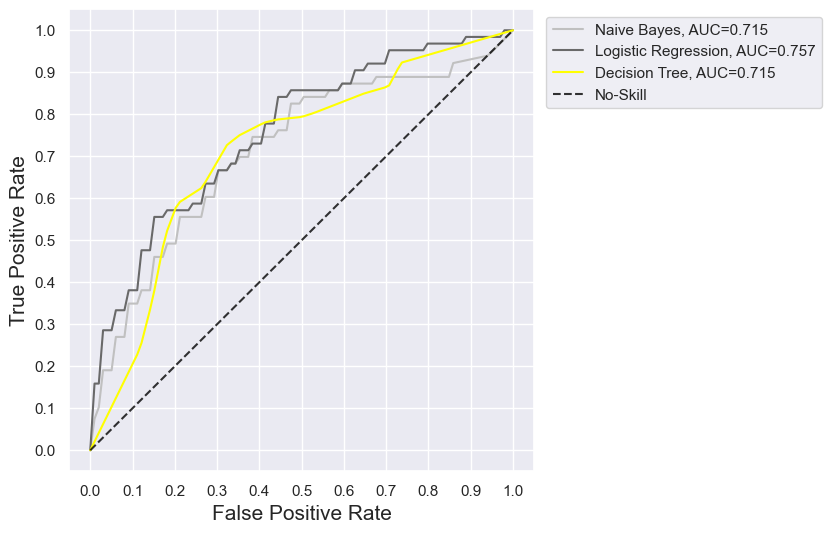

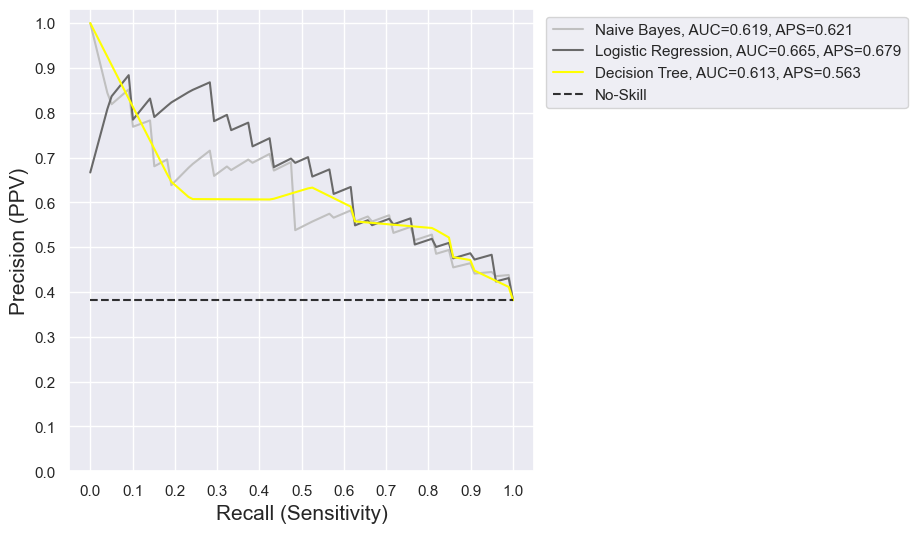

INFO: Saving Metric Summaries...
INFO: Generating Metric Boxplots...


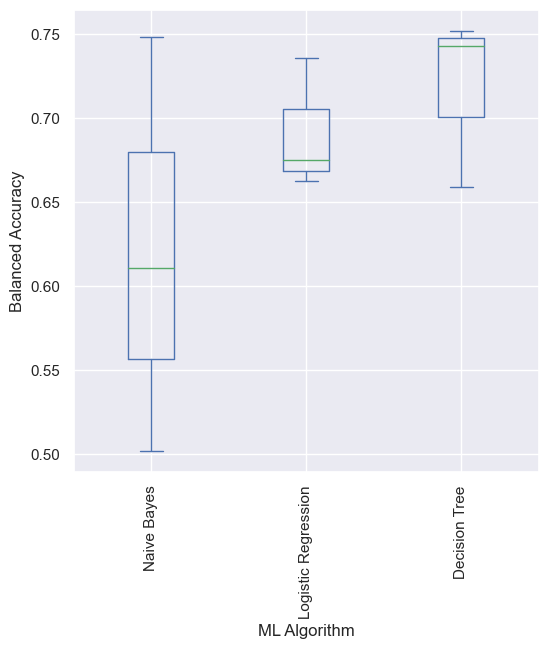

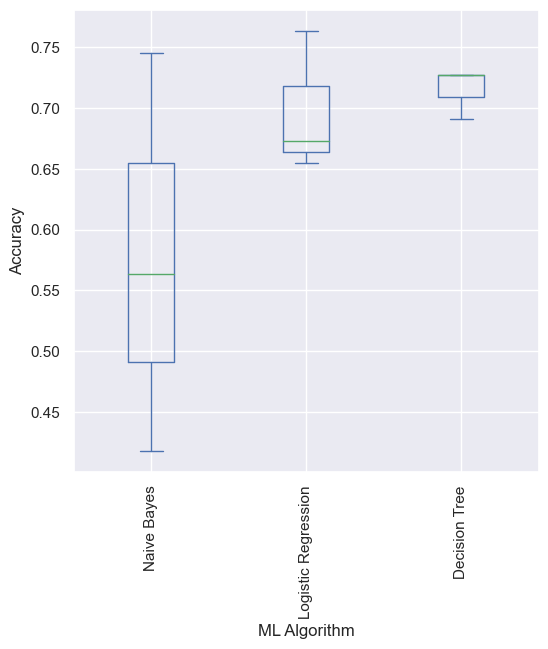

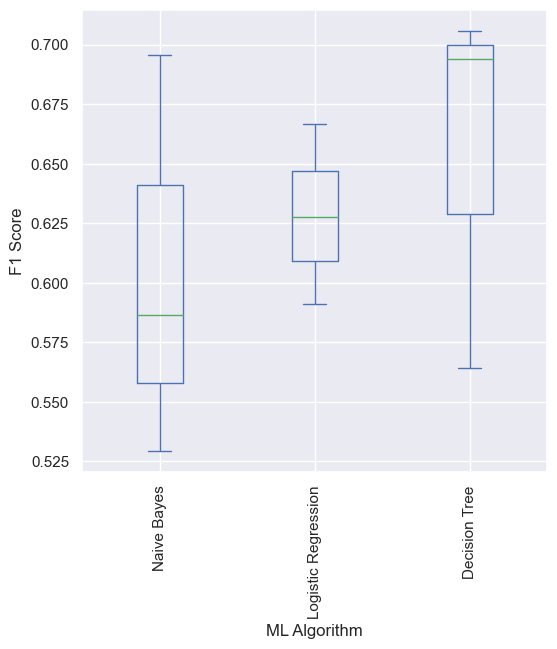

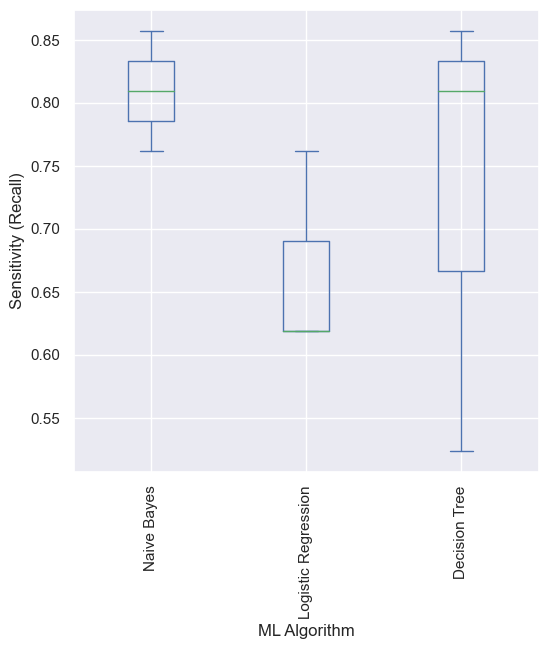

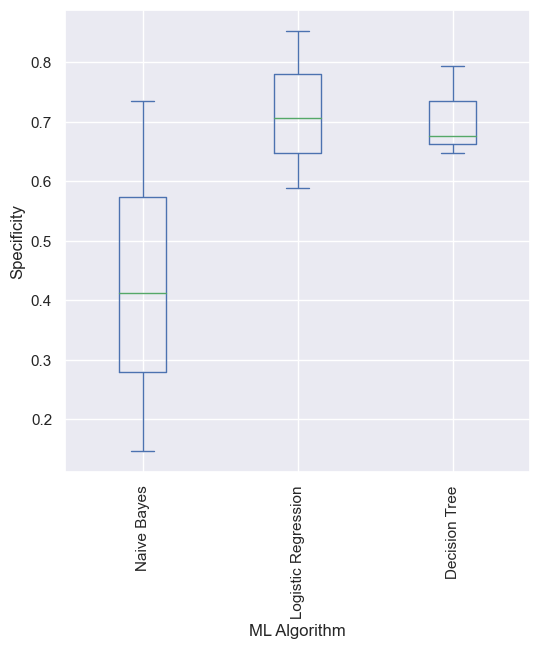

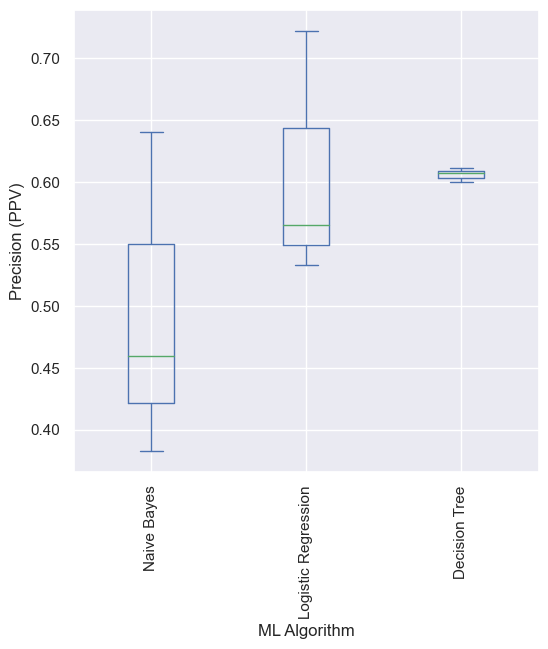

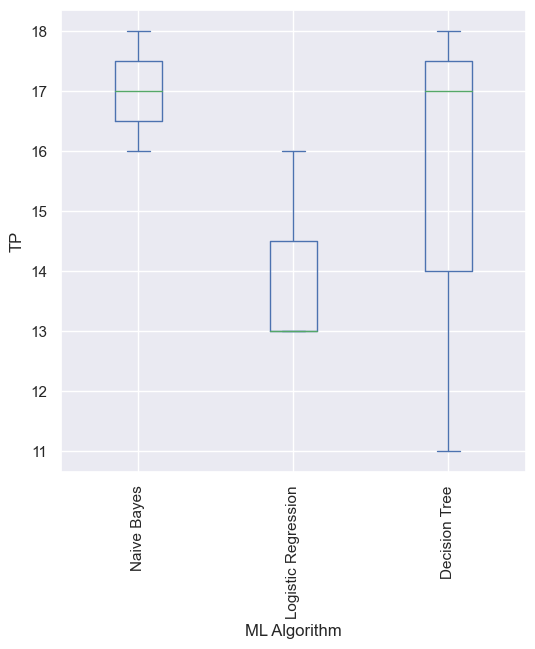

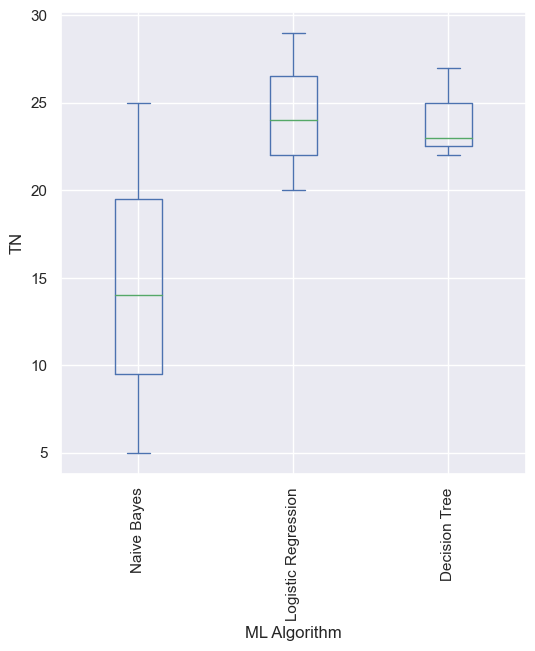

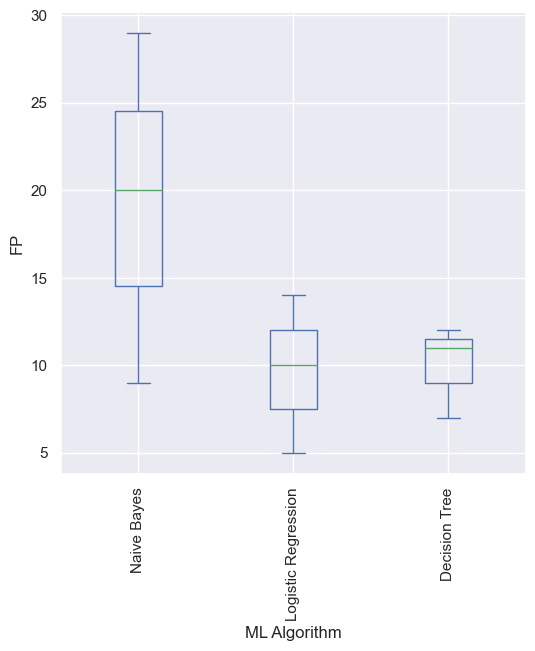

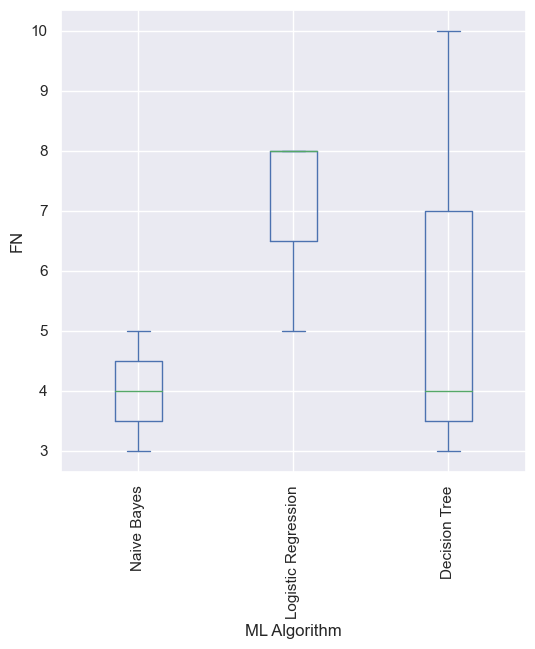

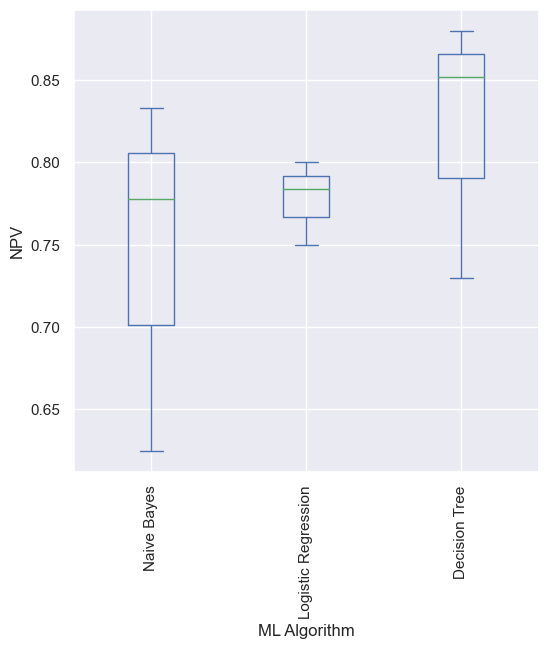

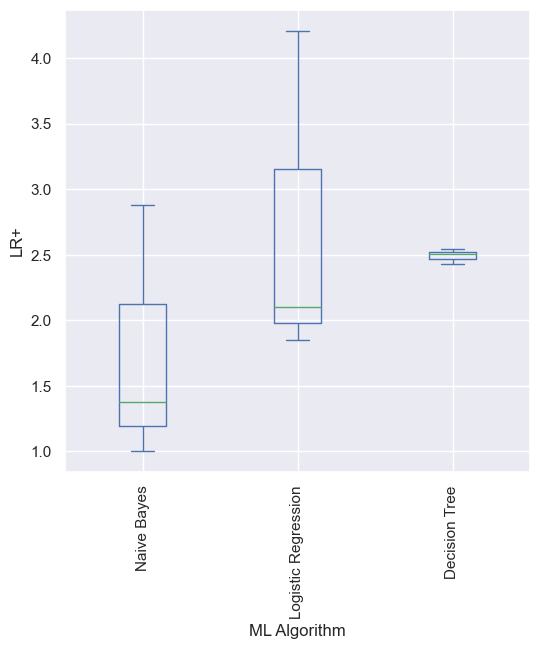

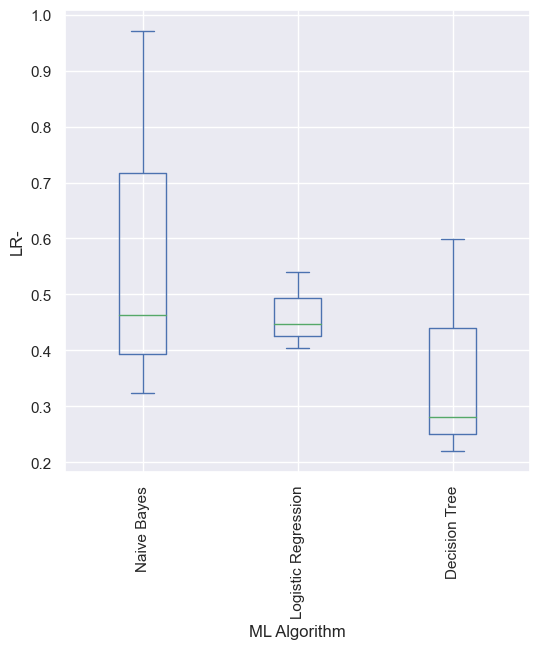

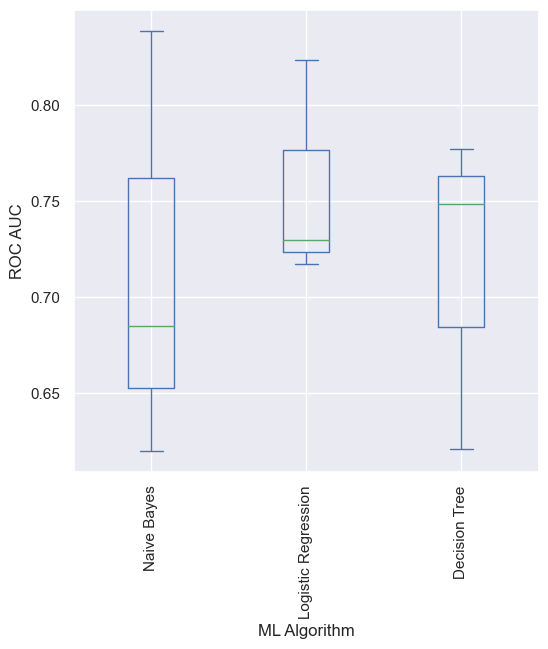

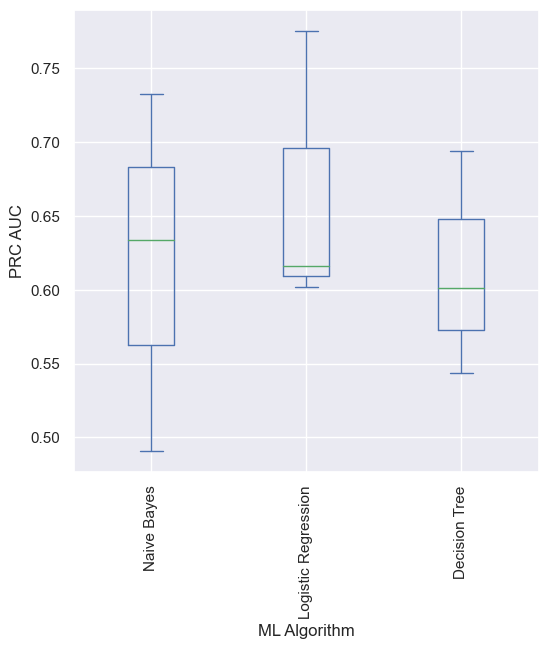

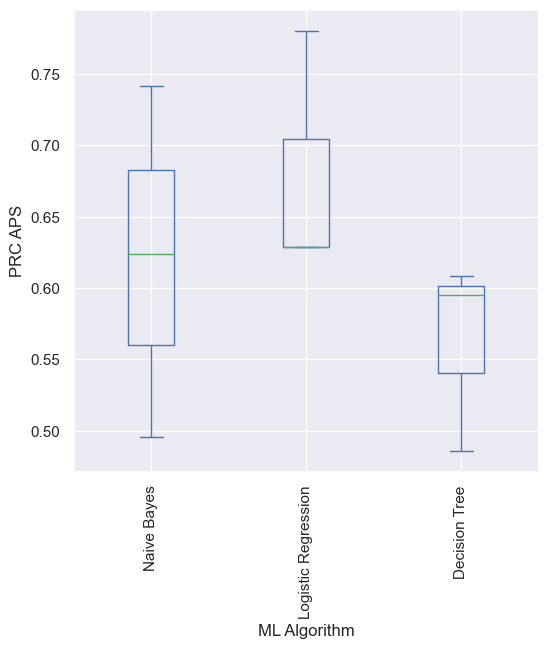

INFO: Running Non-Parametric Statistical Significance Analysis...
INFO: Preparing for Model Feature Importance Plotting...
INFO: Generating Feature Importance Boxplot and Histograms...


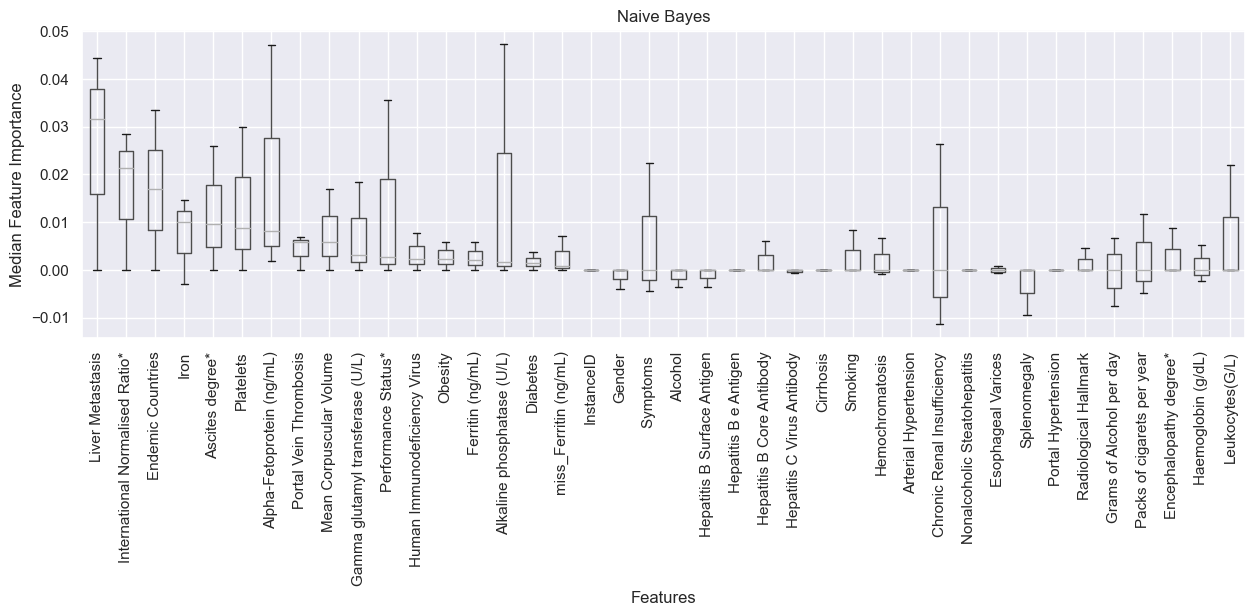

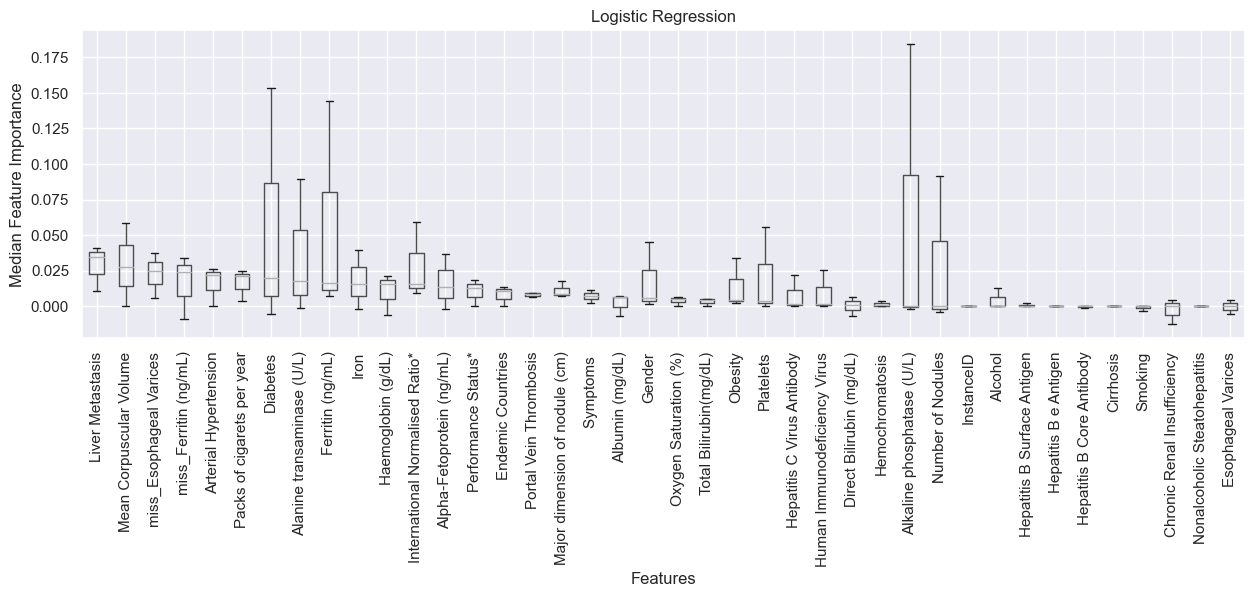

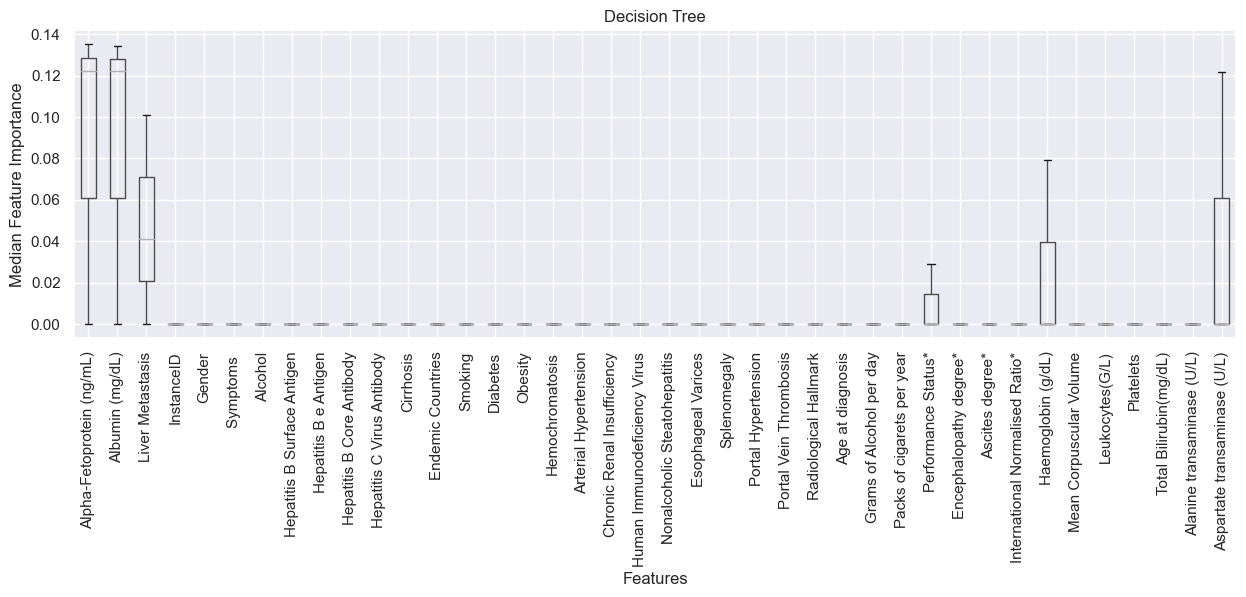

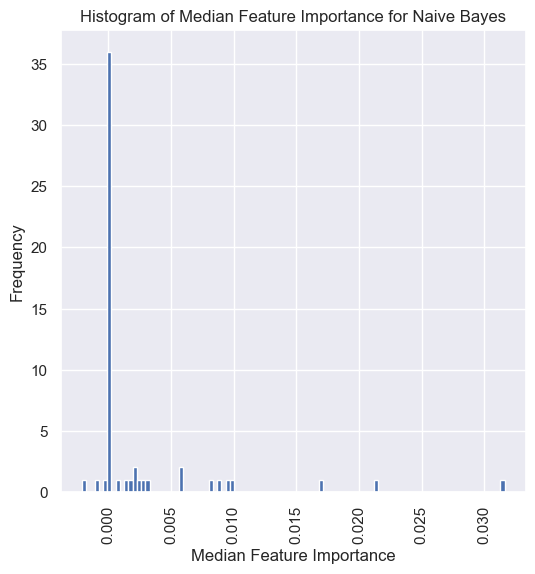

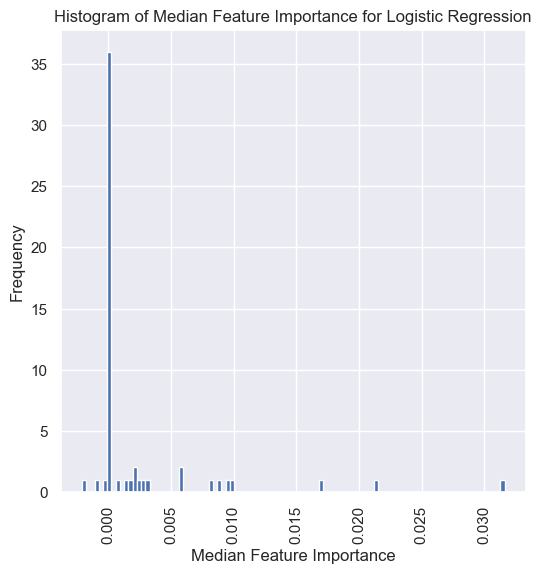

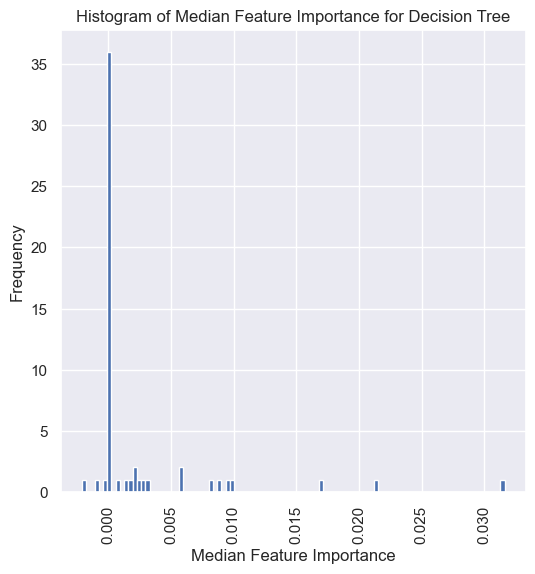

INFO: Generating Composite Feature Importance Plots...


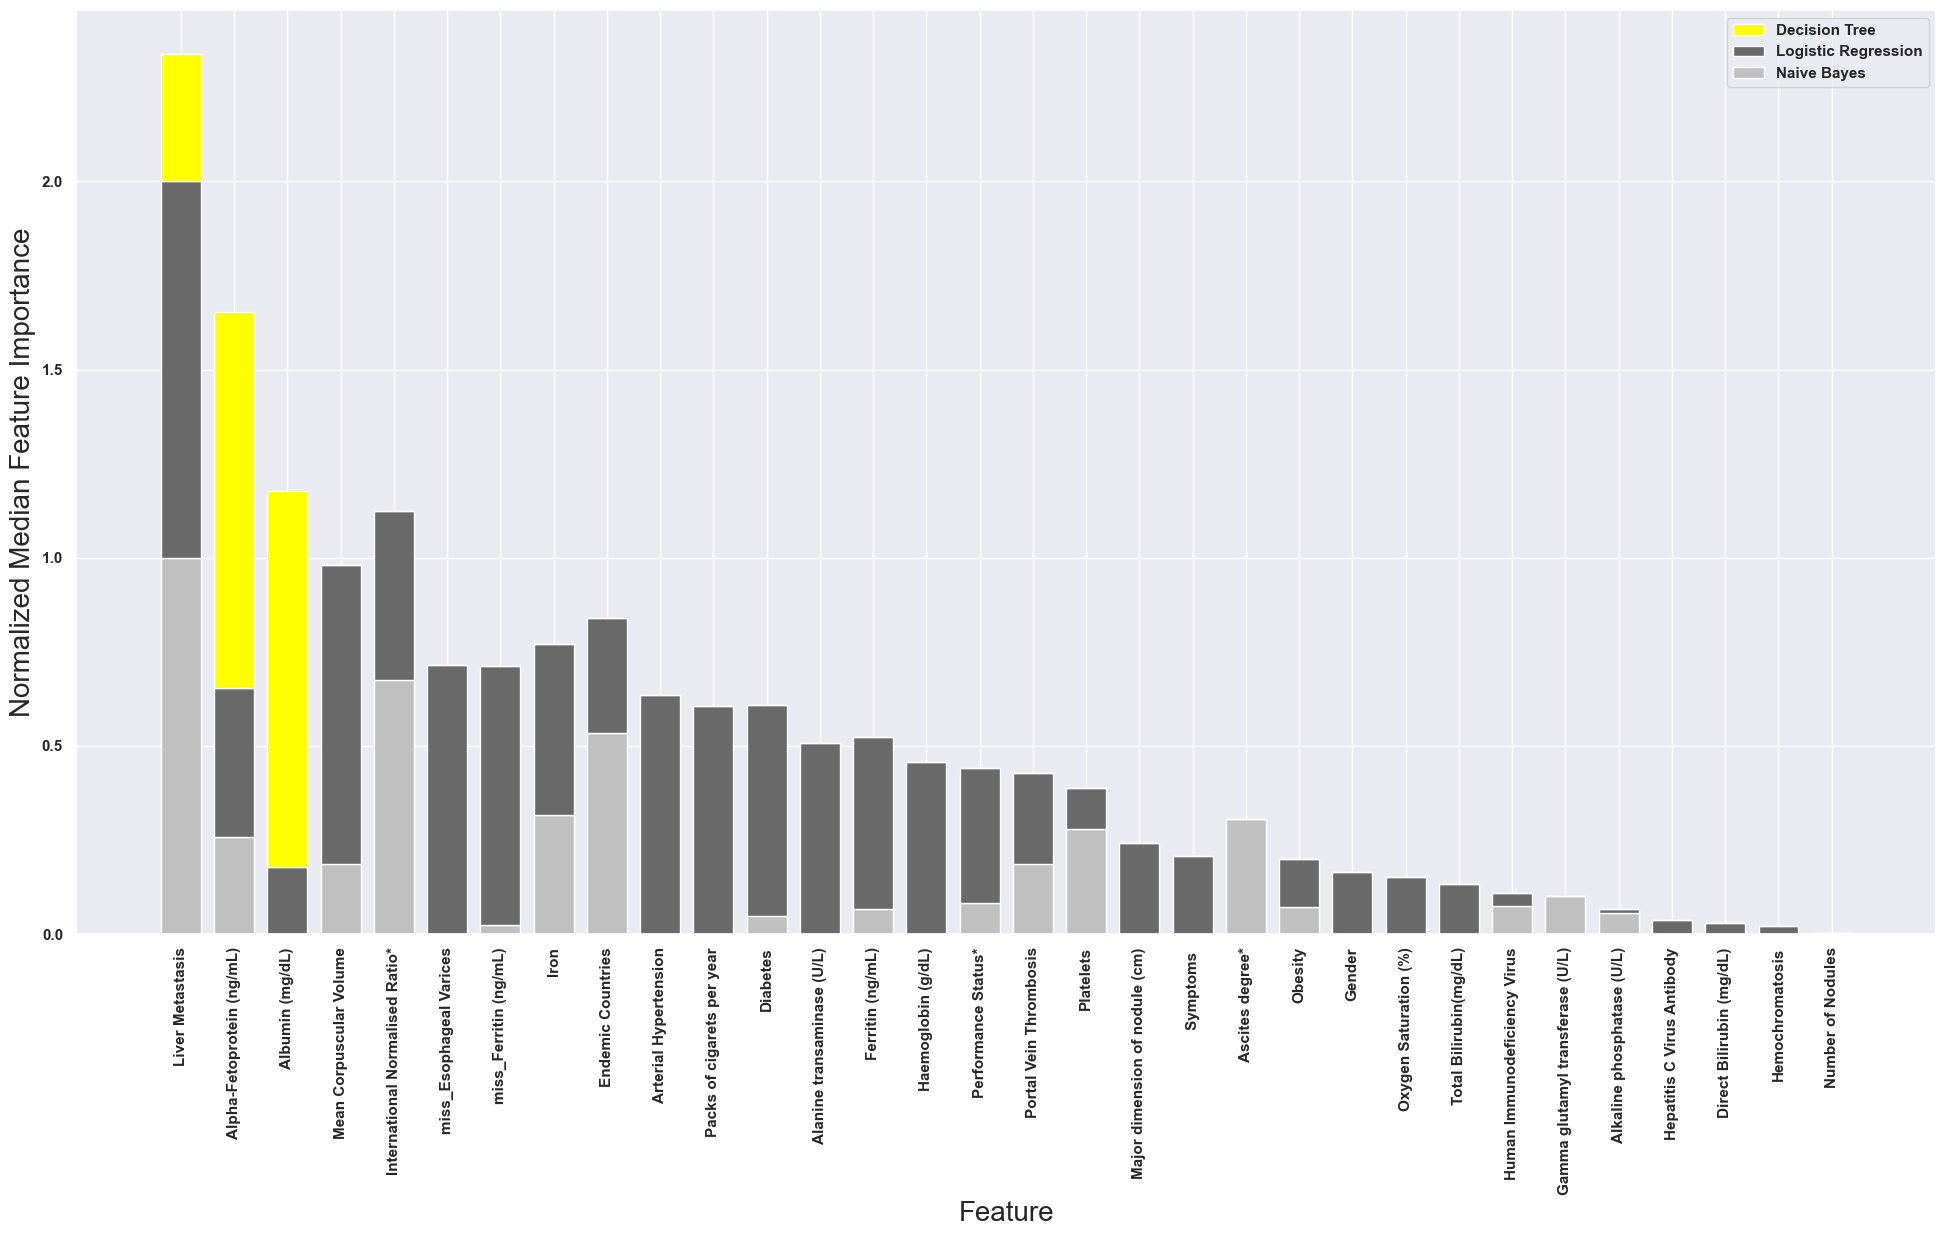

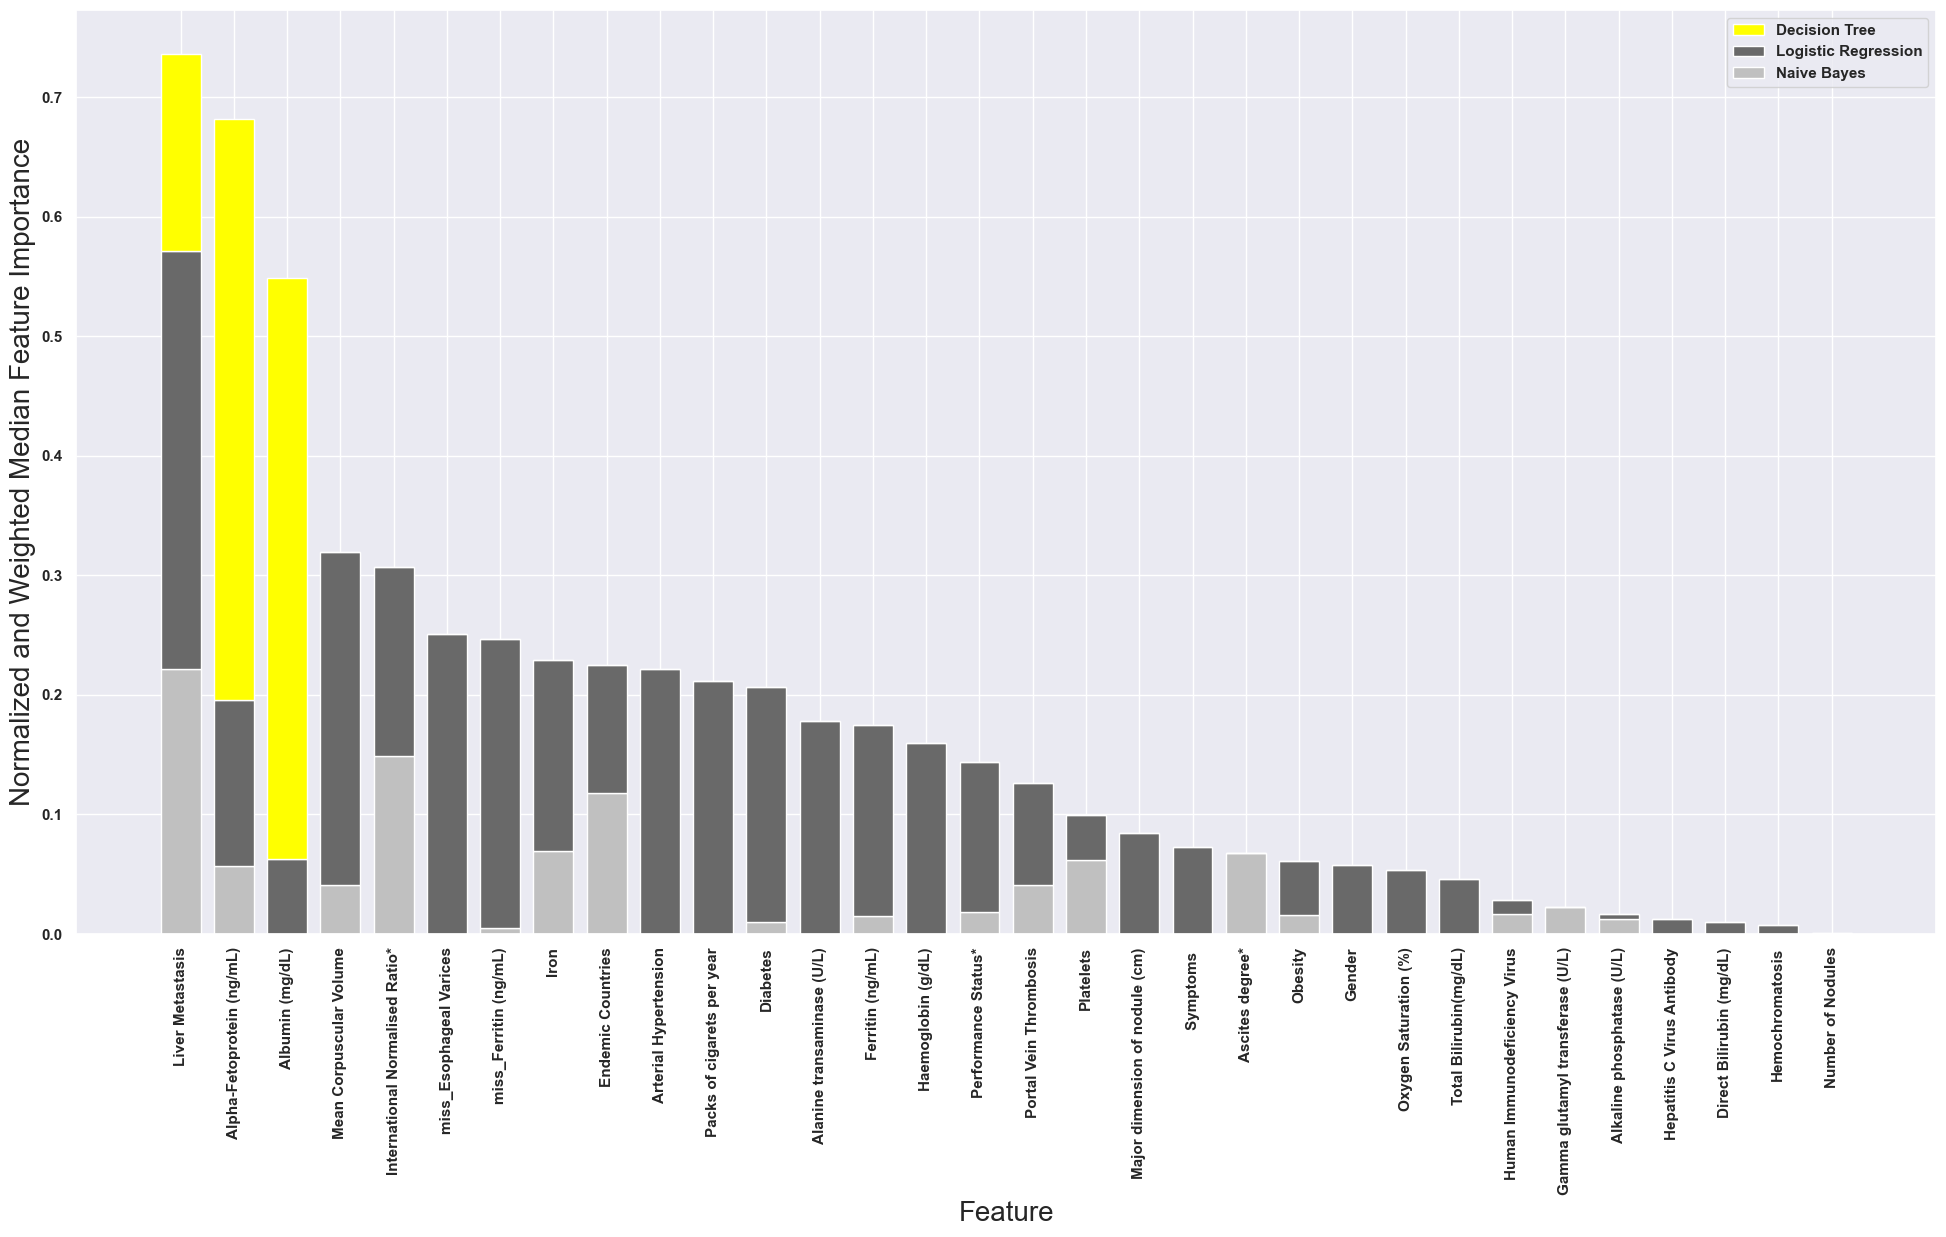

INFO: hcc-data_example phase 5 complete
INFO: Running Statistics Summary for hcc-data_example_no_covariates
INFO: Running stats on Naive Bayes


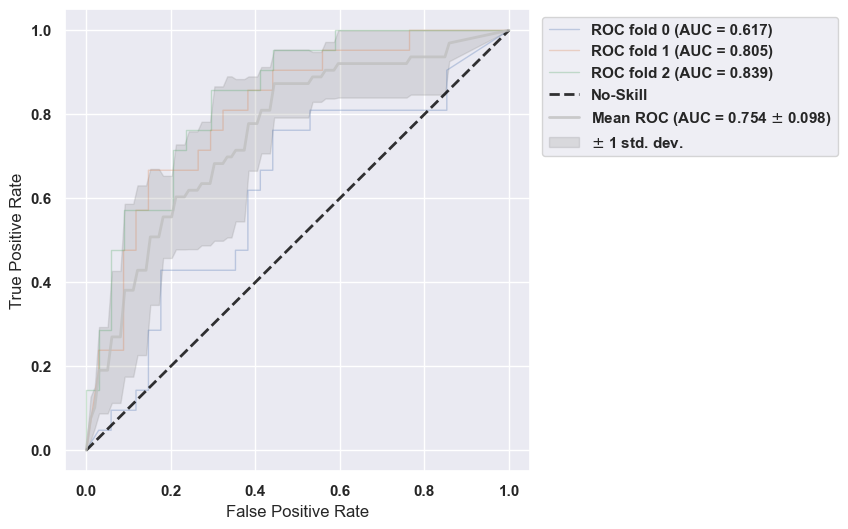

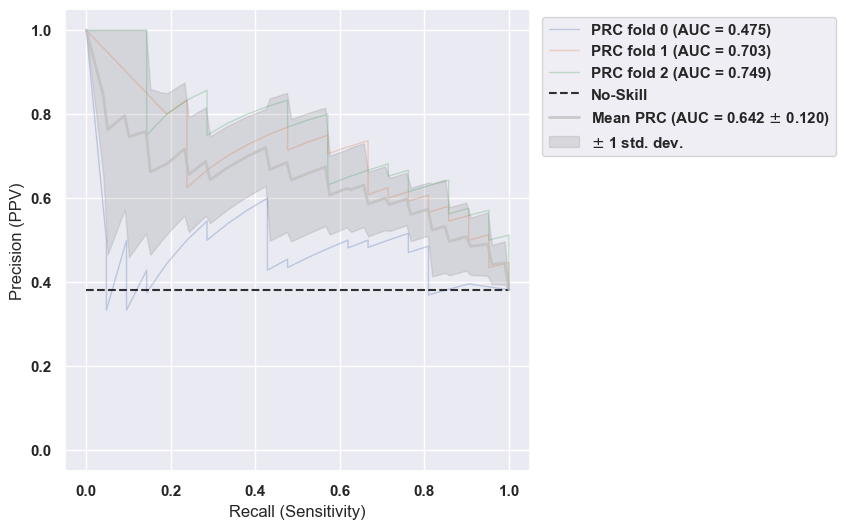

INFO: Running stats on Logistic Regression


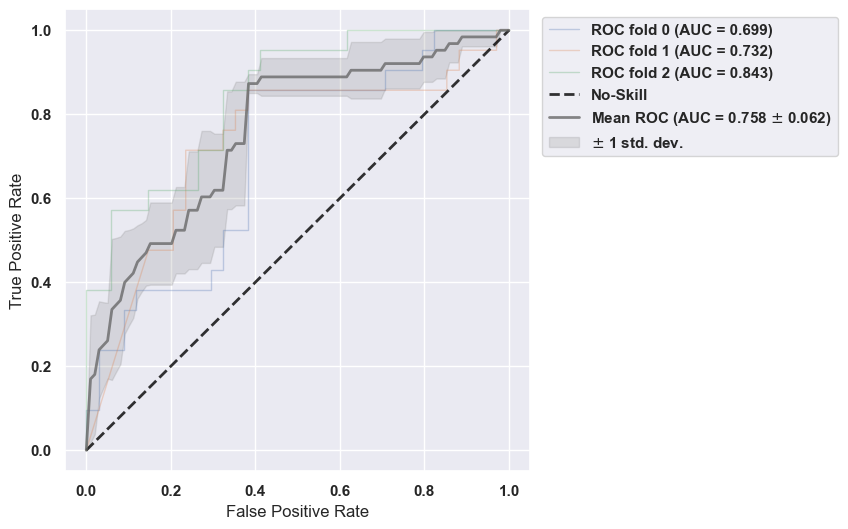

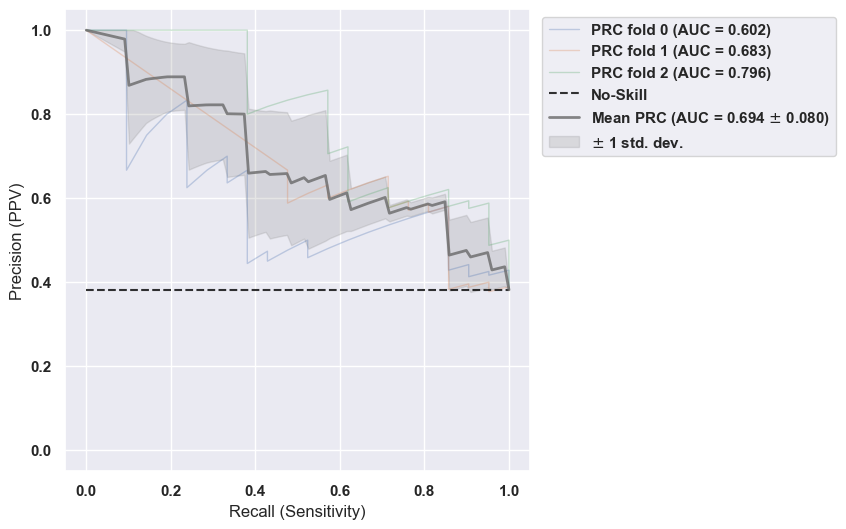

INFO: Running stats on Decision Tree


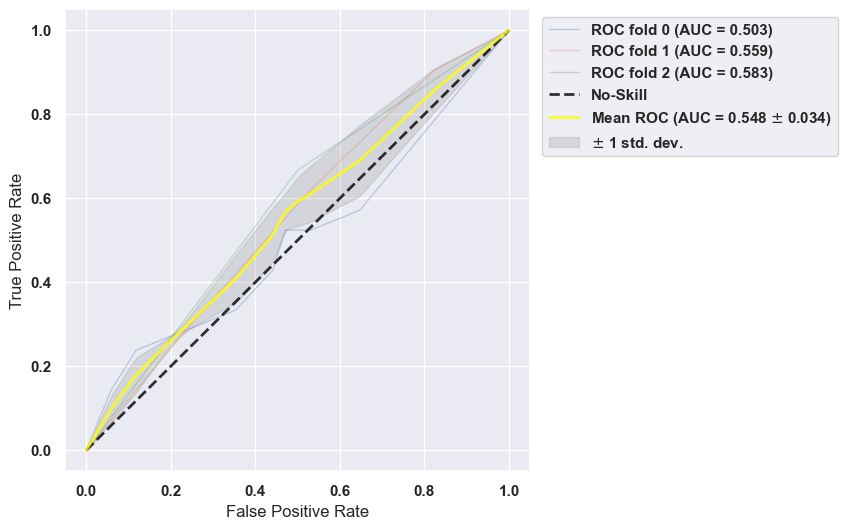

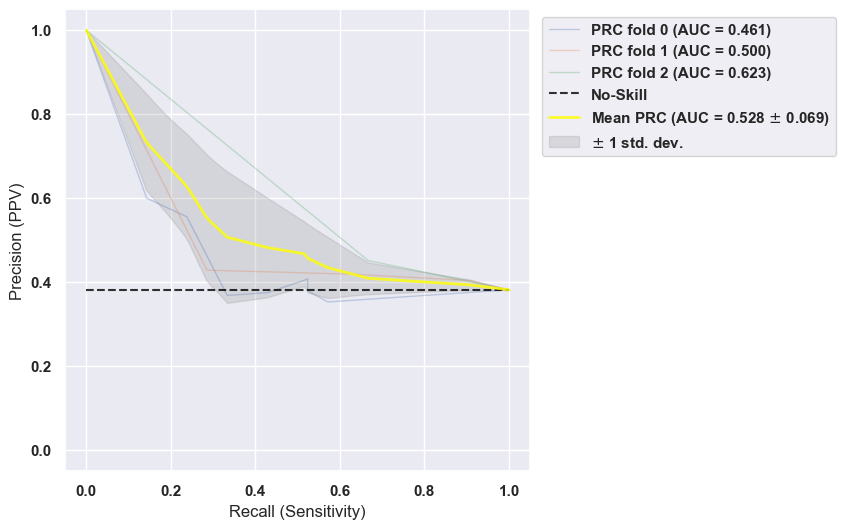

INFO: Generating ROC and PRC plots...


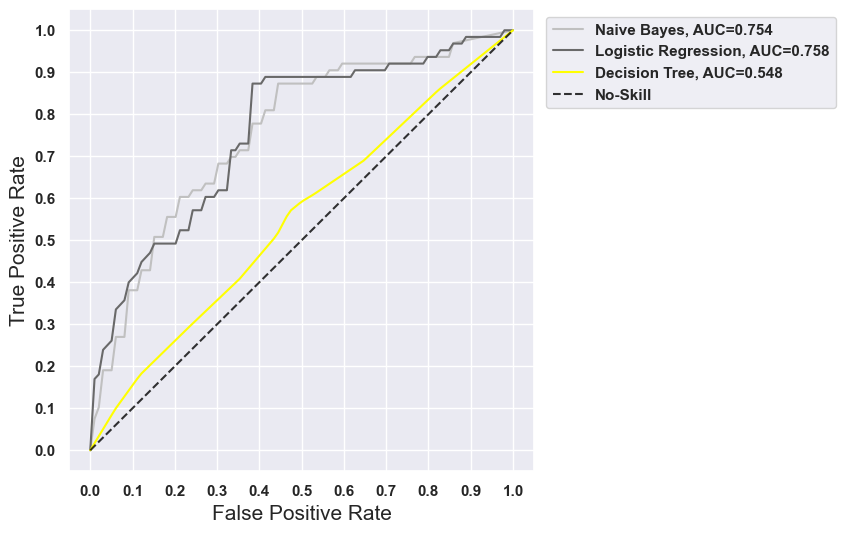

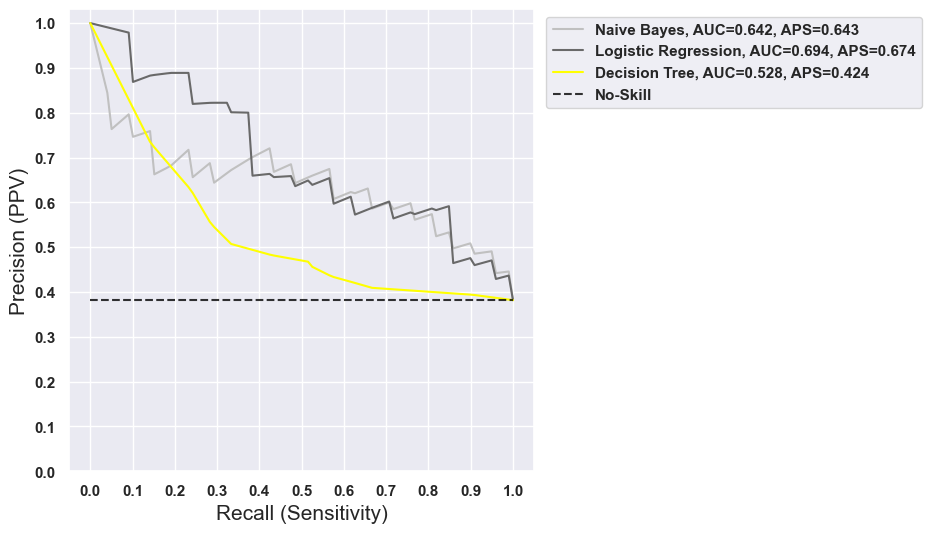

INFO: Saving Metric Summaries...
INFO: Generating Metric Boxplots...


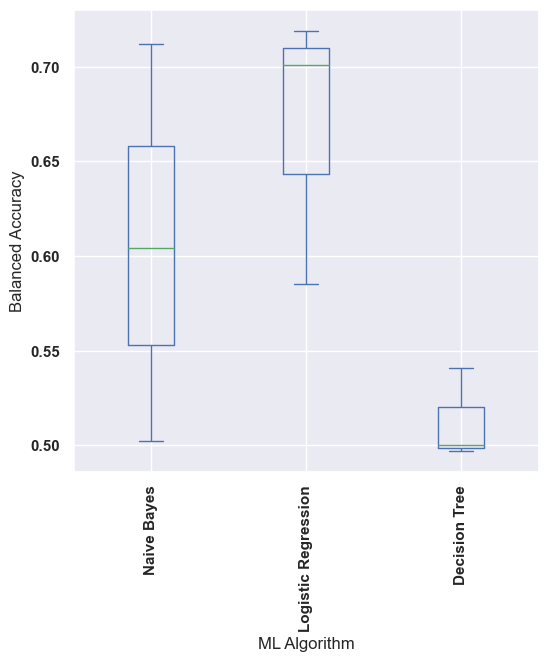

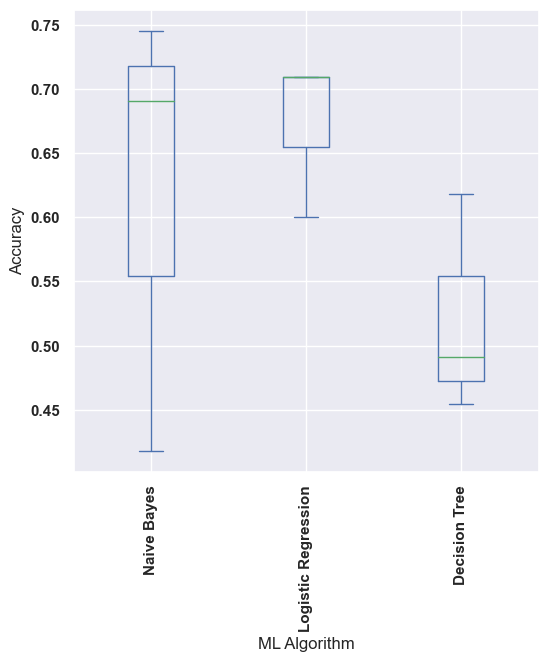

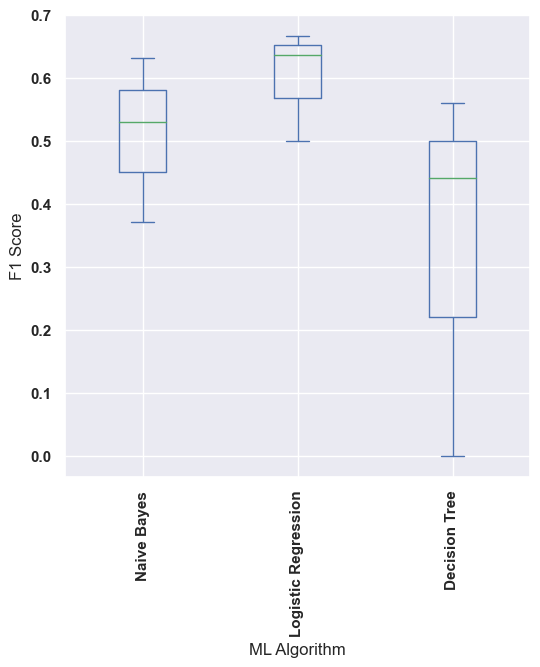

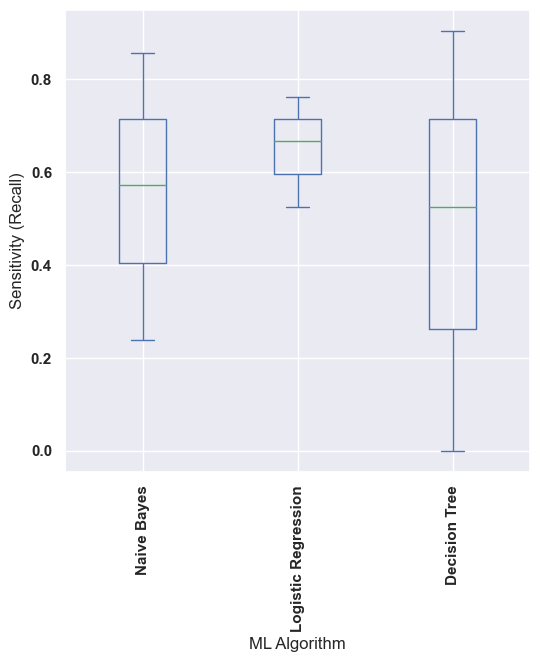

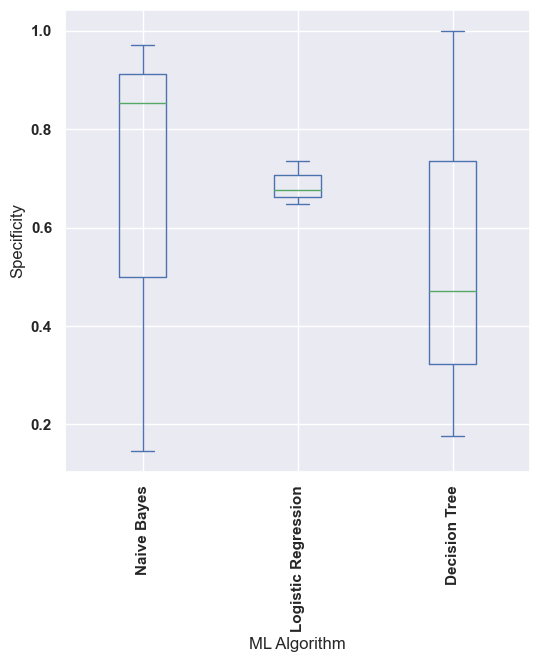

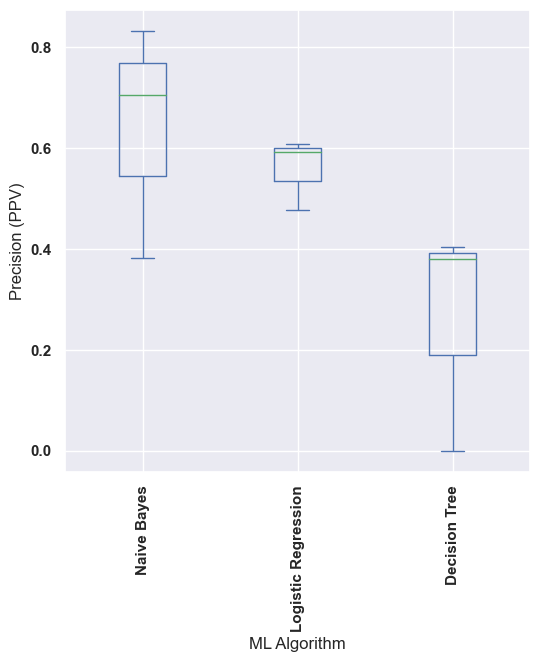

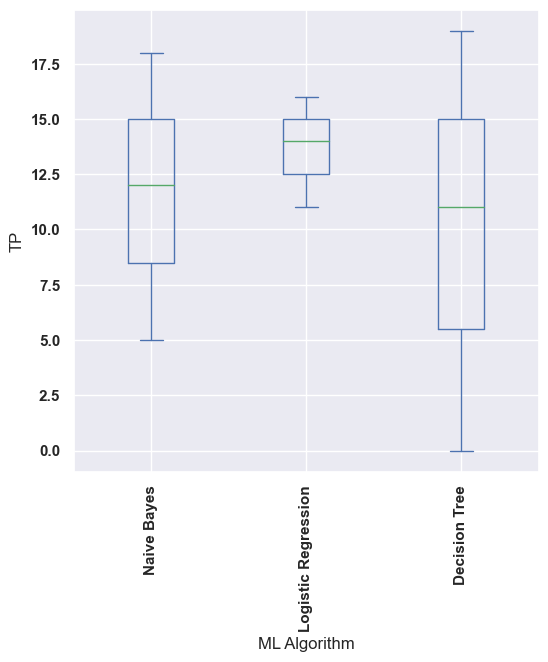

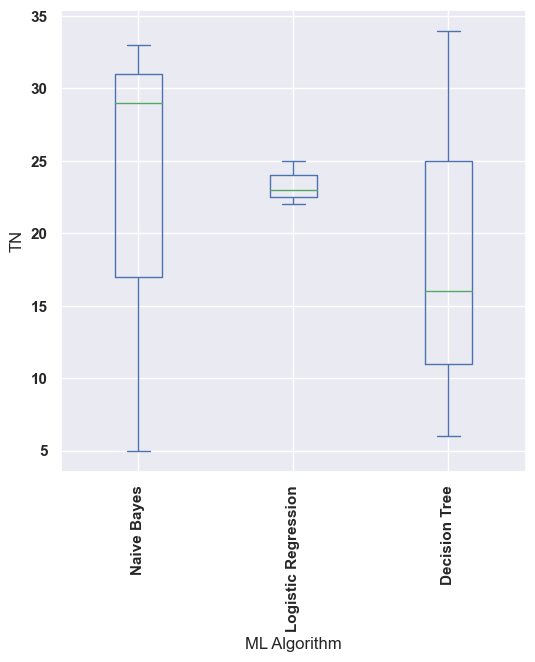

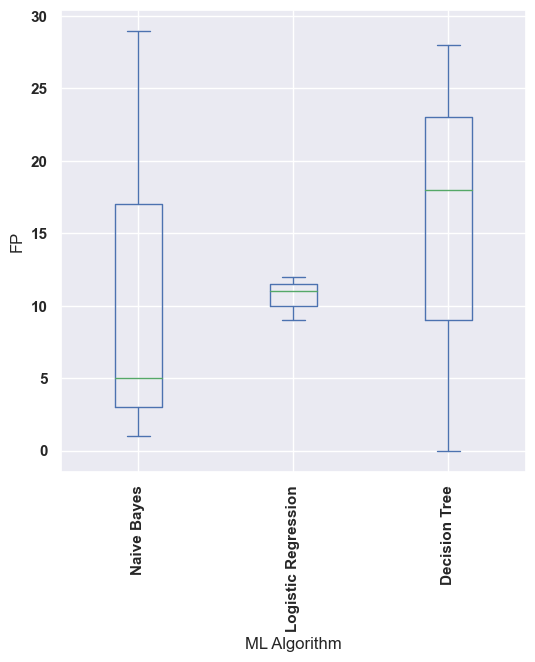

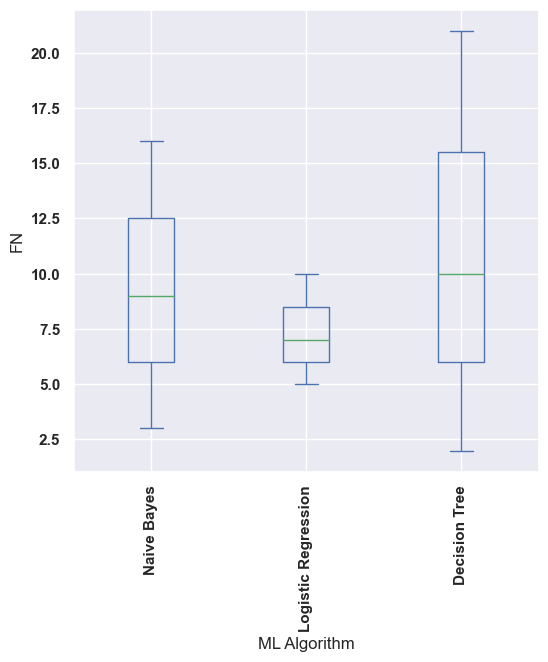

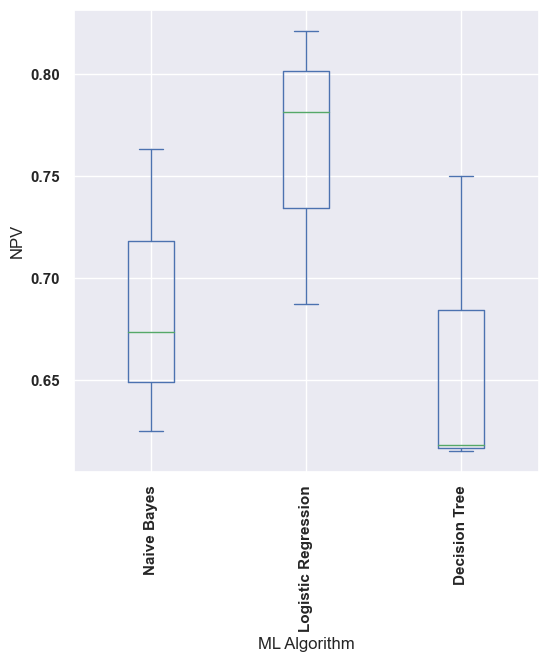

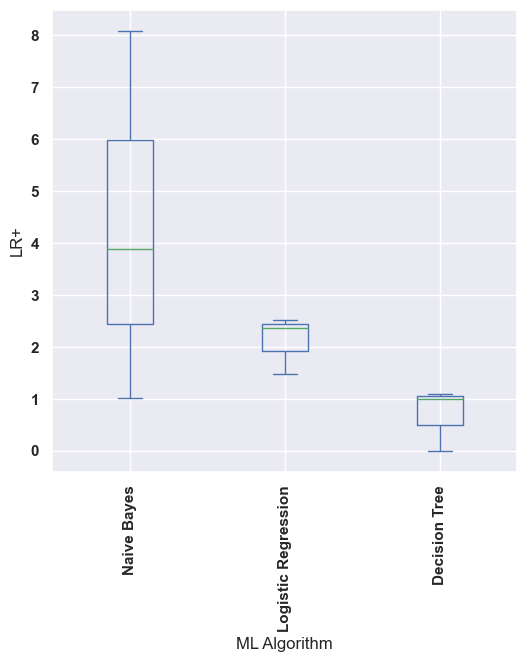

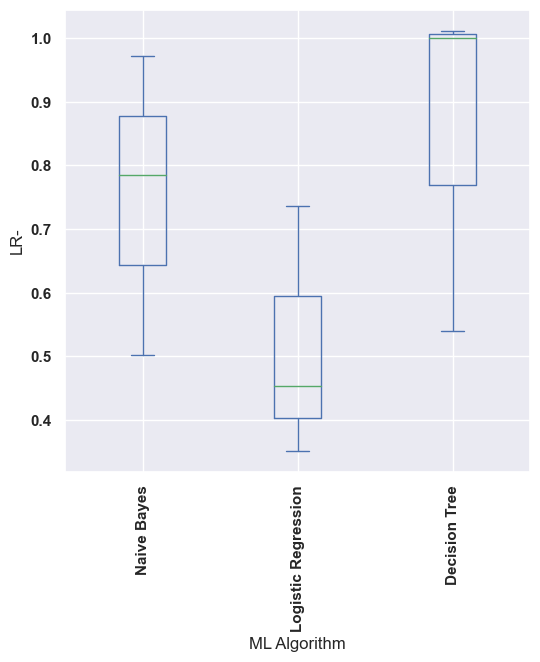

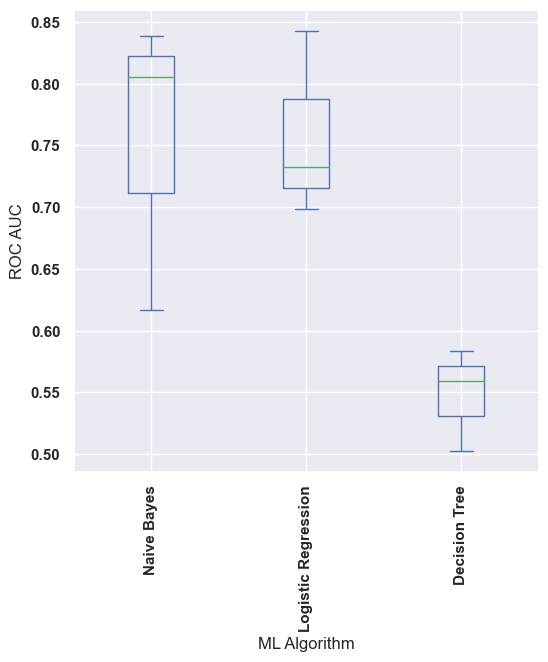

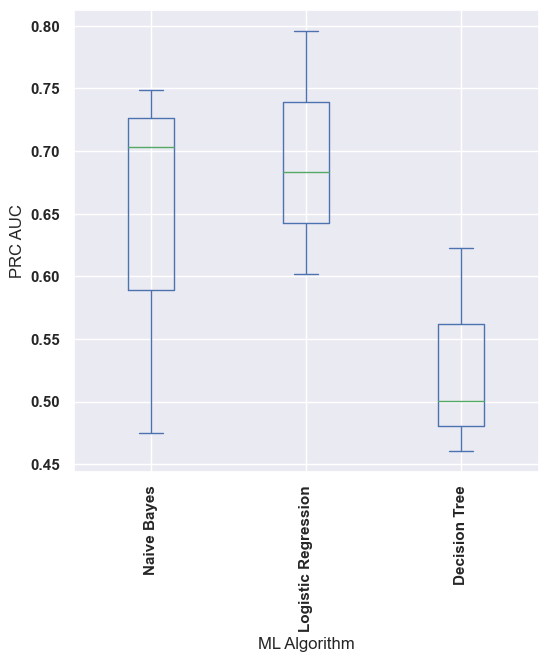

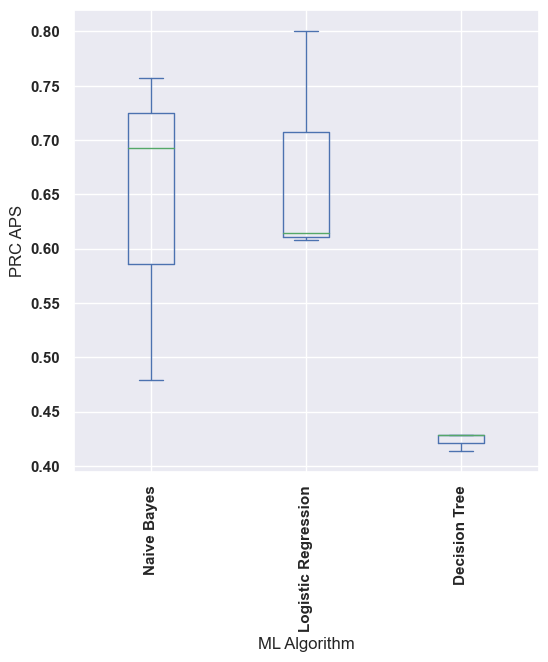

INFO: Running Non-Parametric Statistical Significance Analysis...
INFO: Preparing for Model Feature Importance Plotting...
INFO: Generating Feature Importance Boxplot and Histograms...


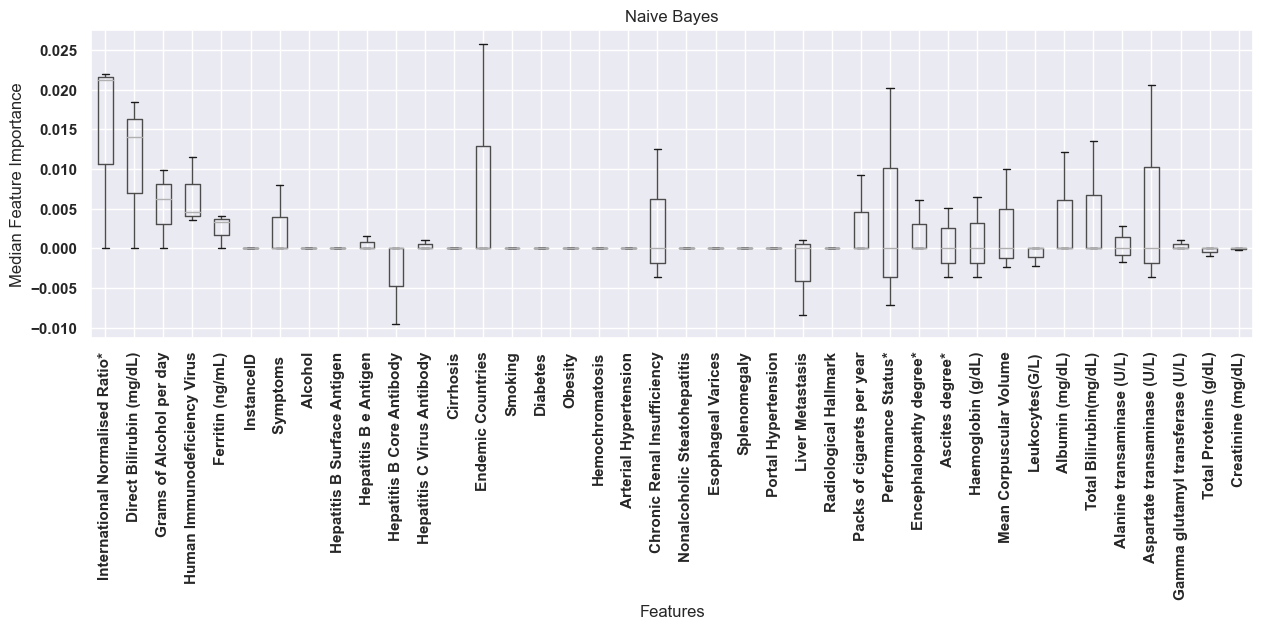

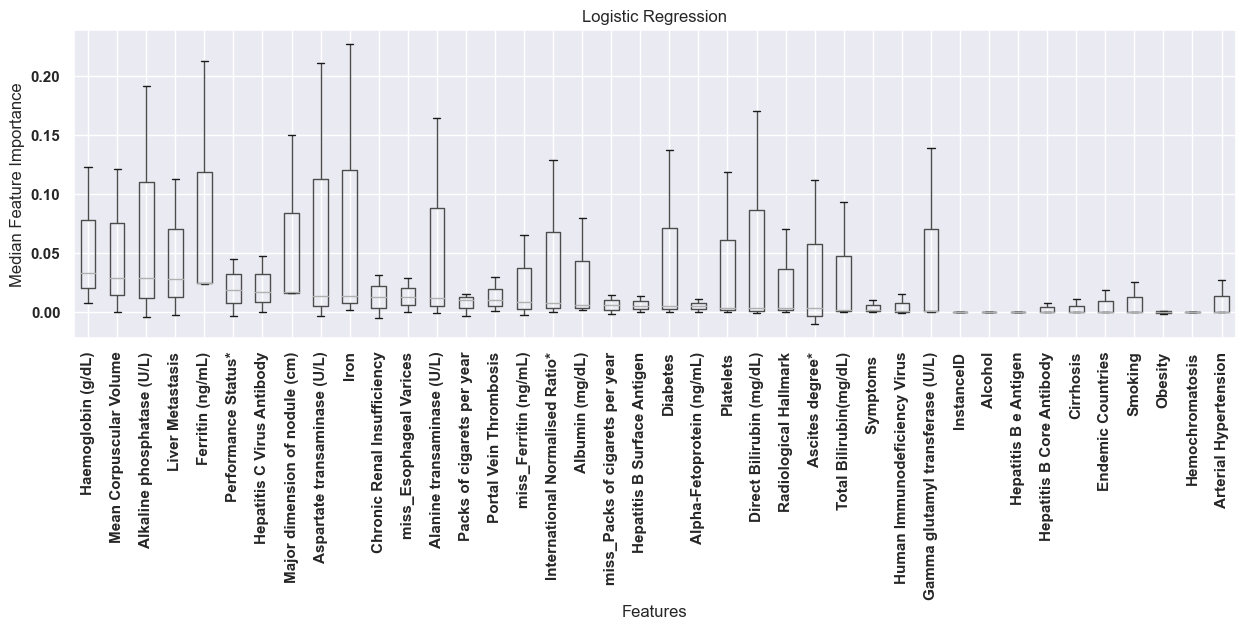

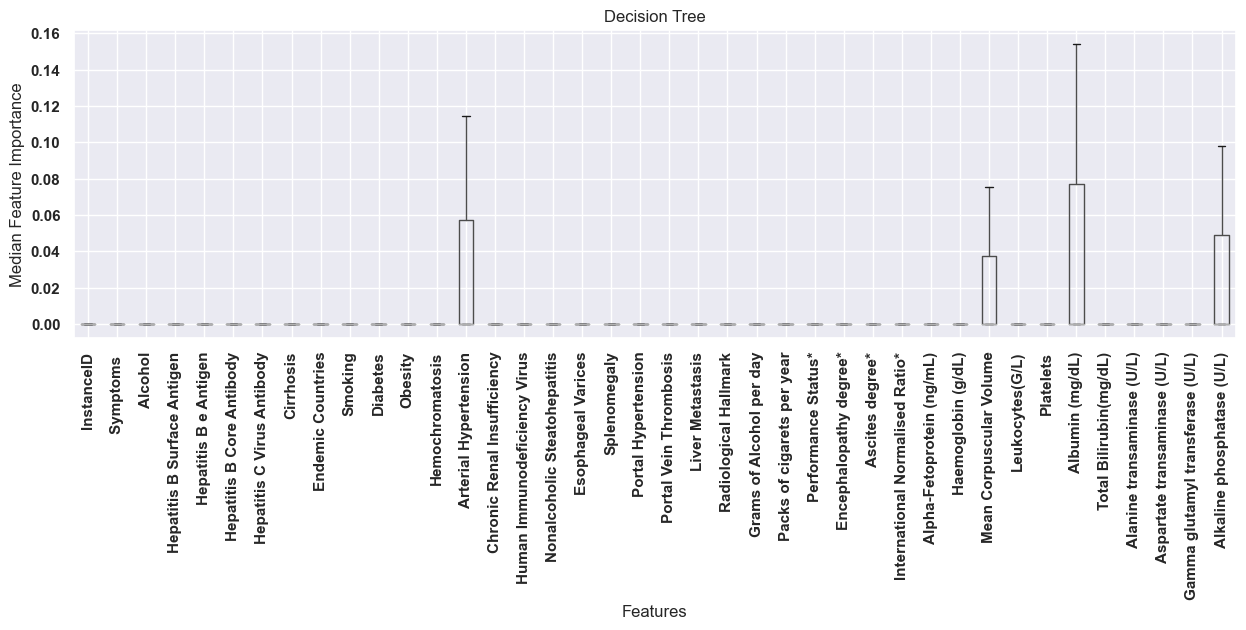

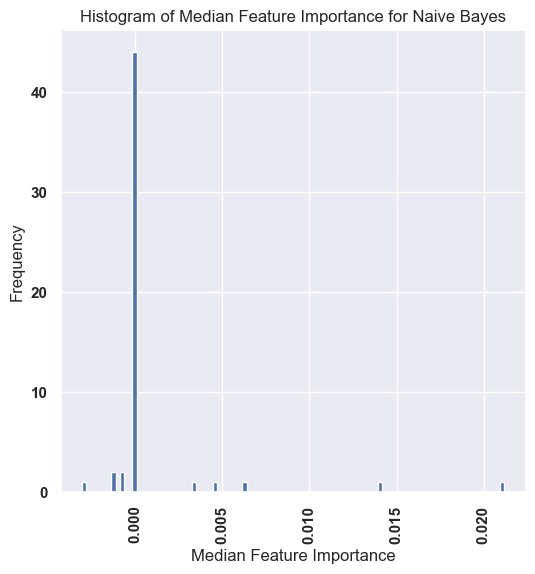

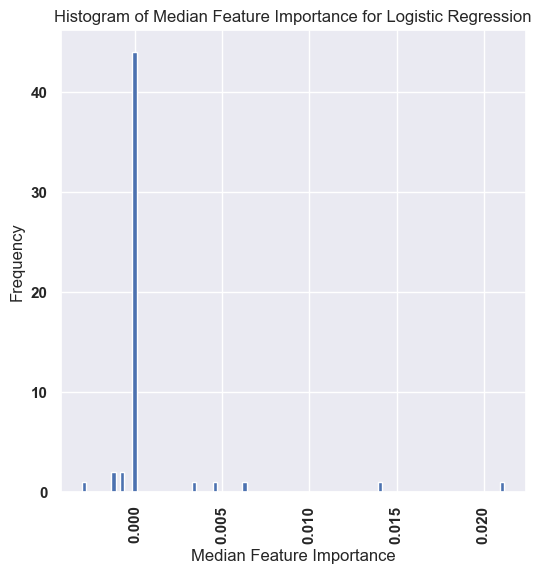

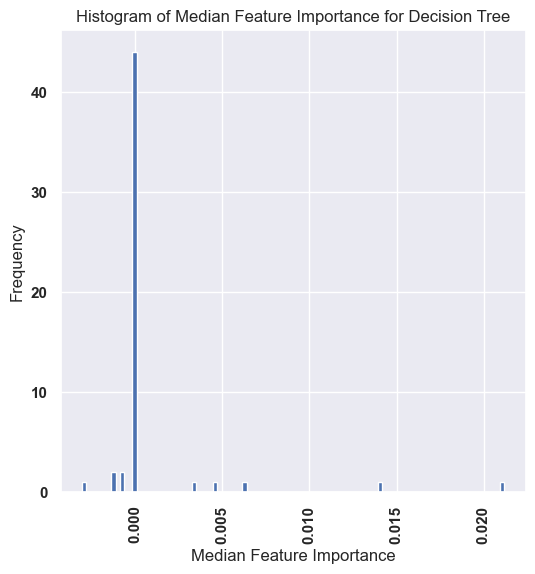

INFO: Generating Composite Feature Importance Plots...


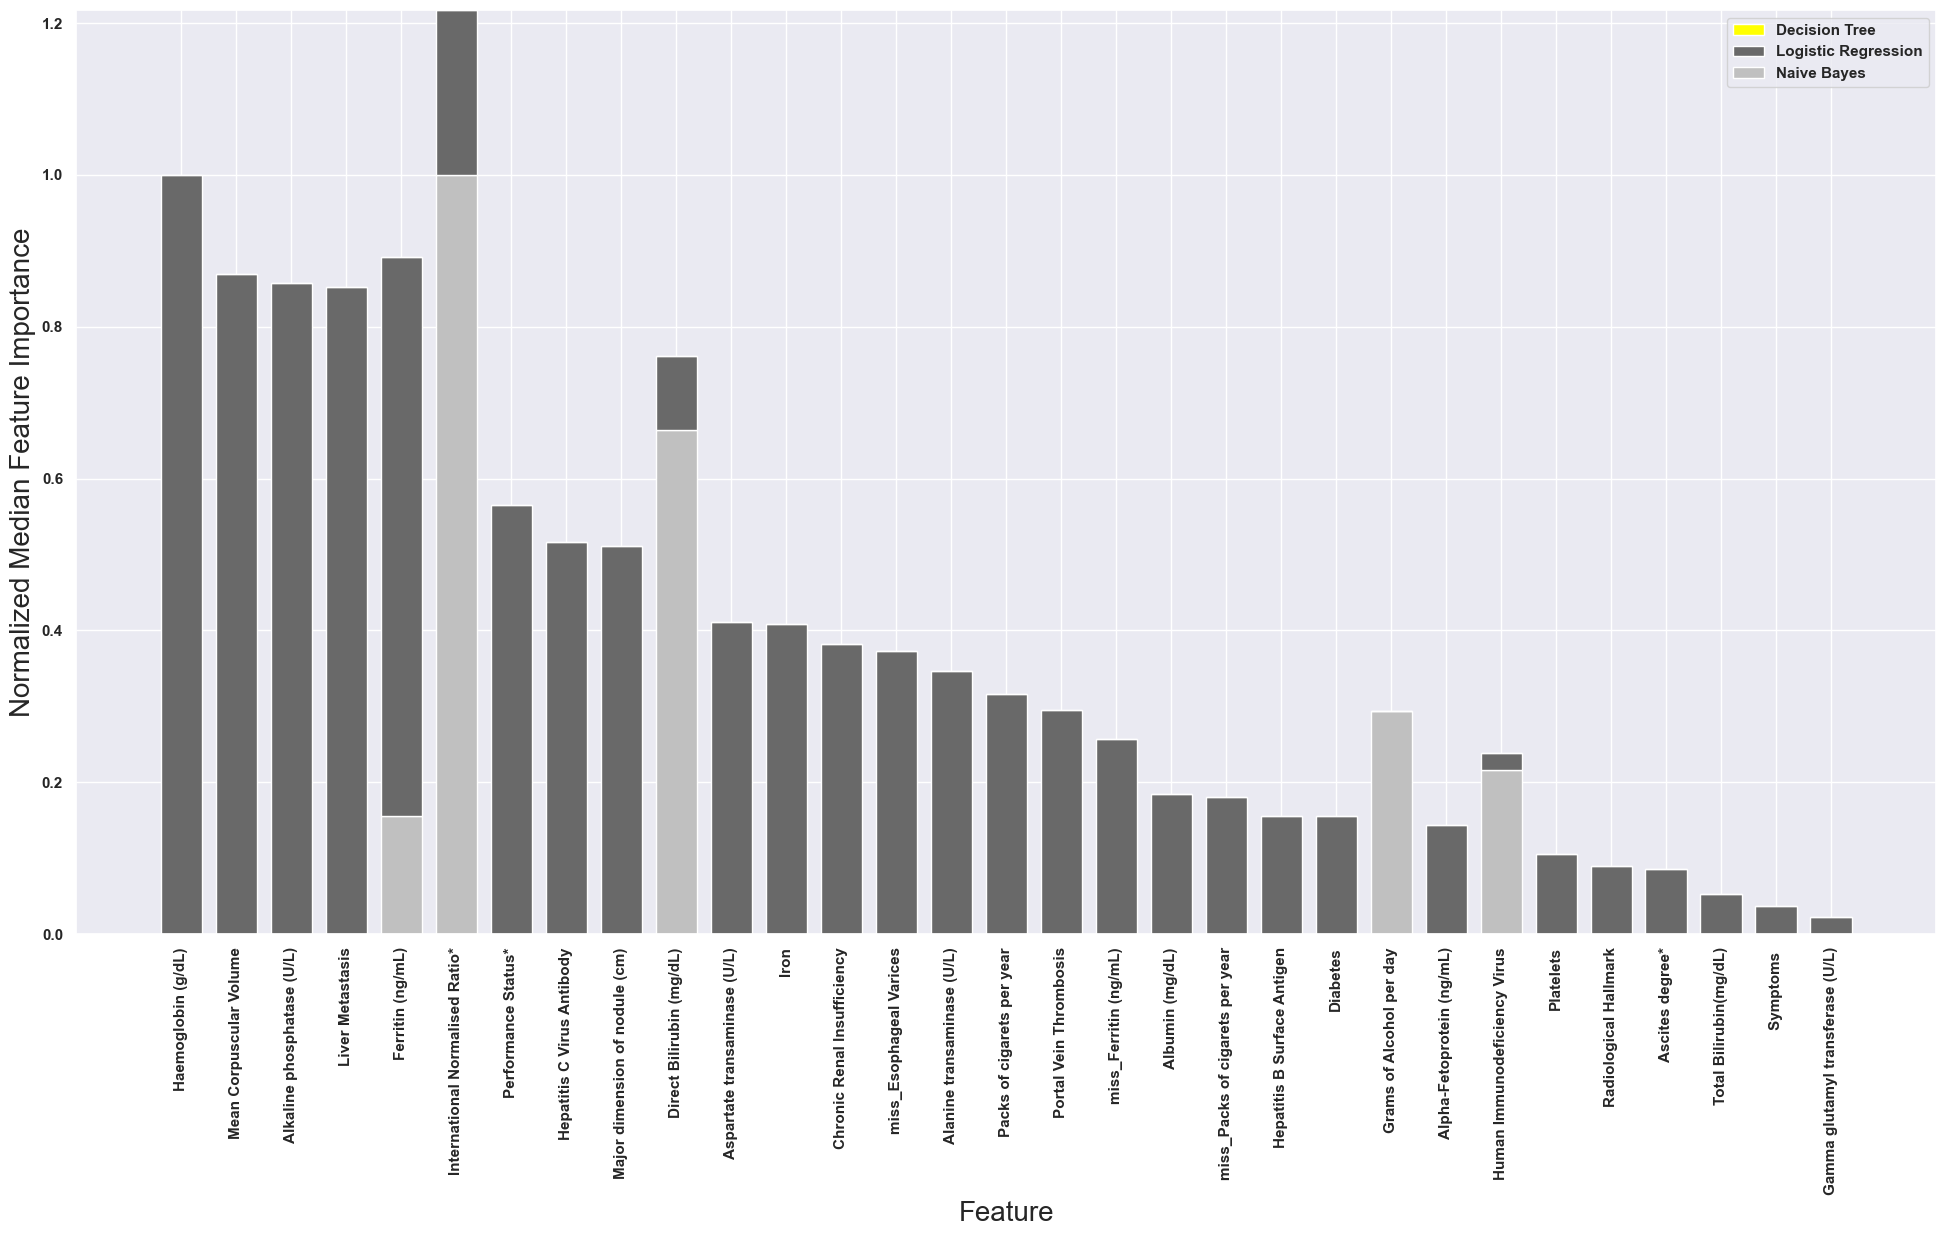

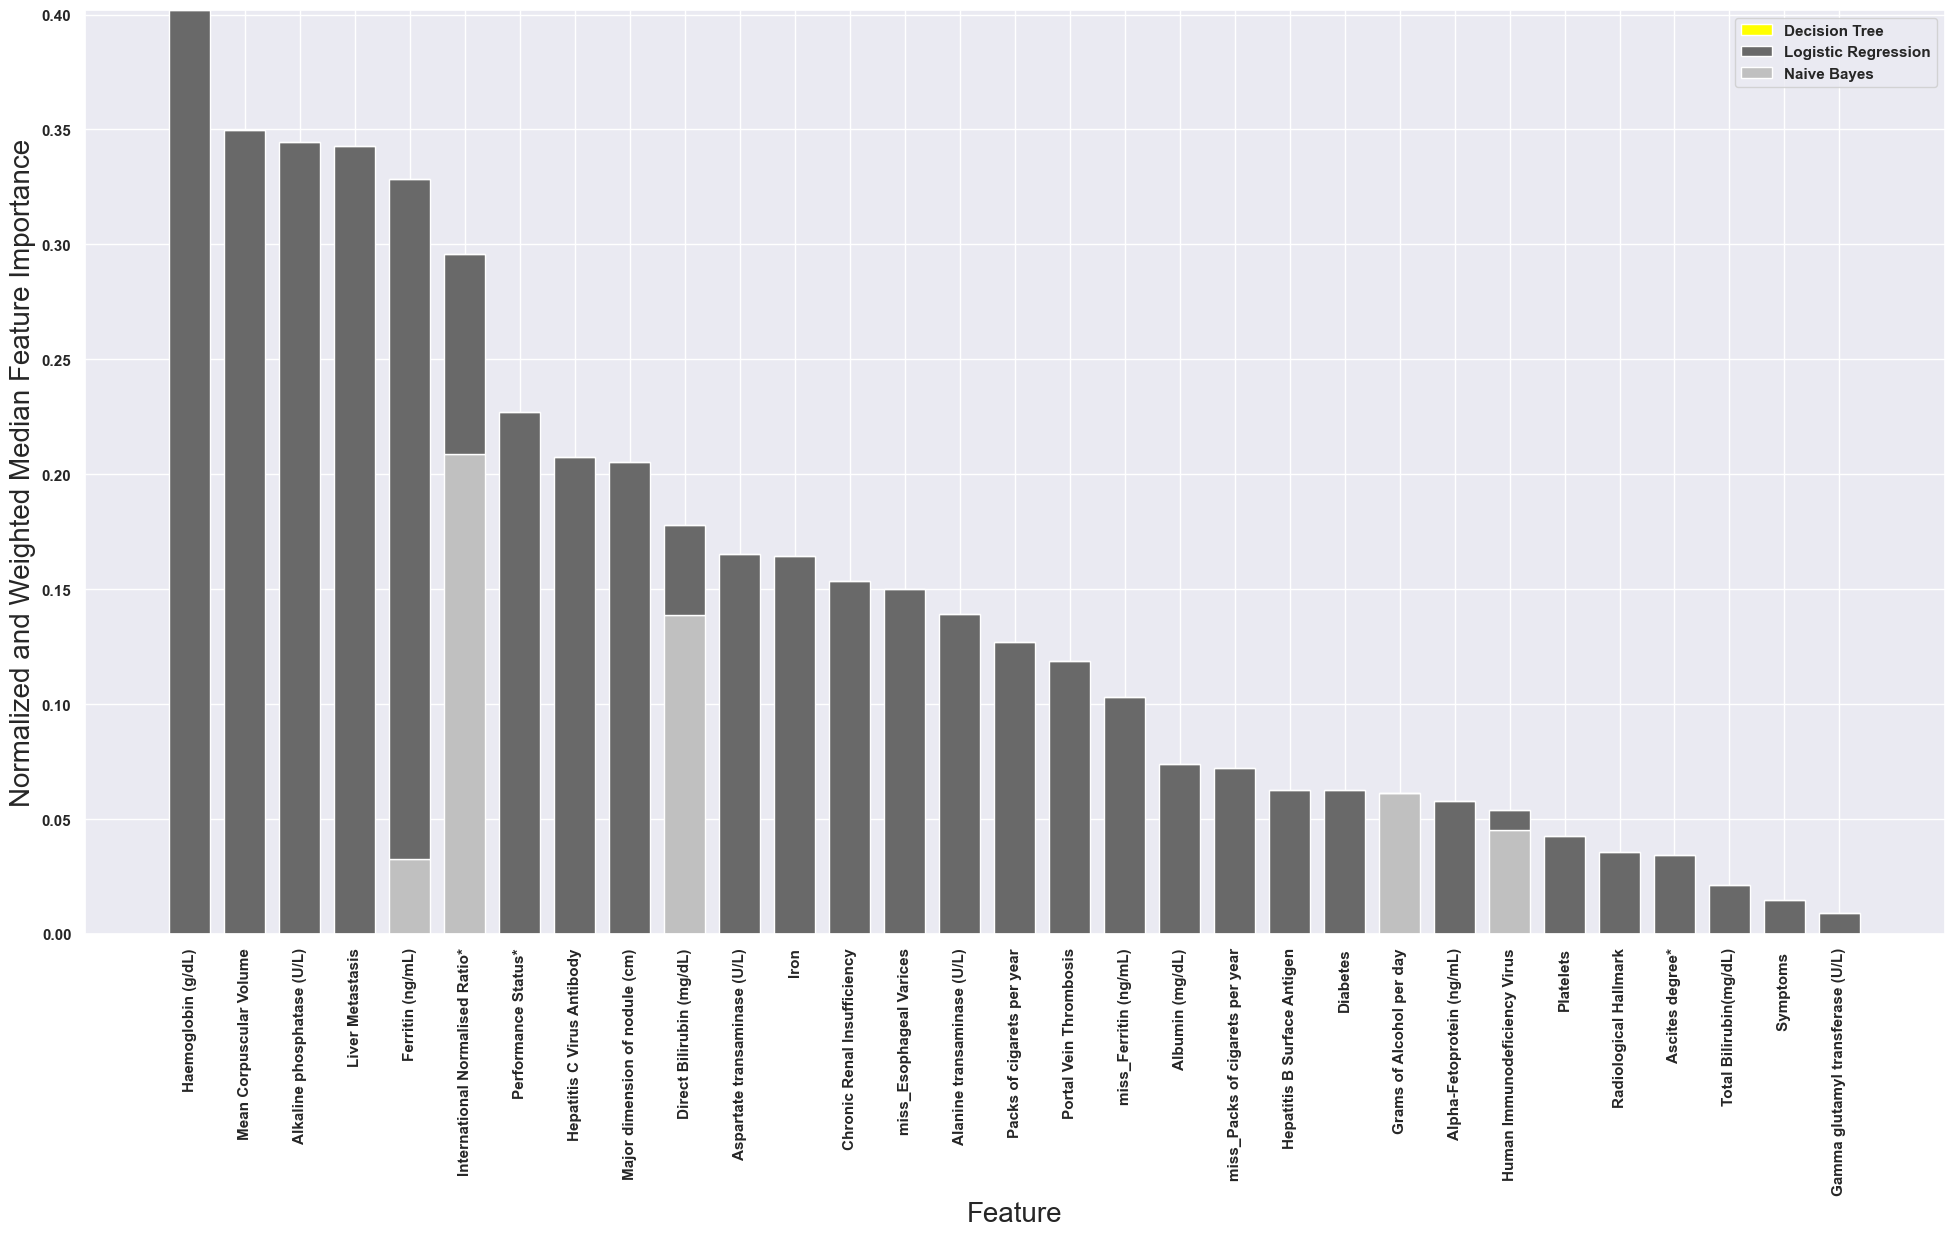

INFO: hcc-data_example_no_covariates phase 5 complete


In [19]:
from streamline.runners.stats_runner import StatsRunner
stats = StatsRunner(output_path, experiment_name, 
                    algorithms=algorithms, exclude=exclude, 
                    class_label=class_label, instance_label=instance_label, 
                    scoring_metric=primary_metric,
                    top_features=top_model_features, sig_cutoff=sig_cutoff, 
                    metric_weight=metric_weight, scale_data=scale_data,
                    plot_roc=plot_ROC, plot_prc=plot_PRC, 
                    plot_fi_box=plot_FI_box, 
                    plot_metric_boxplots=plot_metric_boxplots, 
                    show_plots=True)
stats.run(run_parallel=False)

## Phase 7: Dataset Comparison (Optional: Use only if > 1 dataset was analyzed)

In [20]:
#@title Function to check length for more than one dataset case
def len_datasets(output_path, experiment_name):
    datasets = os.listdir(output_path + '/' + experiment_name)
    remove_list = ['.DS_Store', 'metadata.pickle', 'metadata.csv', 'algInfo.pickle',
                   'jobsCompleted', 'logs', 'jobs', 'DatasetComparisons', 'UsefulNotebooks',
                   experiment_name + '_ML_Pipeline_Report.pdf']
    for text in remove_list:
        if text in datasets:
            datasets.remove(text)
    return len(datasets)

INFO: Running Statistical Significance Comparisons Between Multiple Datasets...
INFO: Generate Boxplots Comparing Dataset Performance...


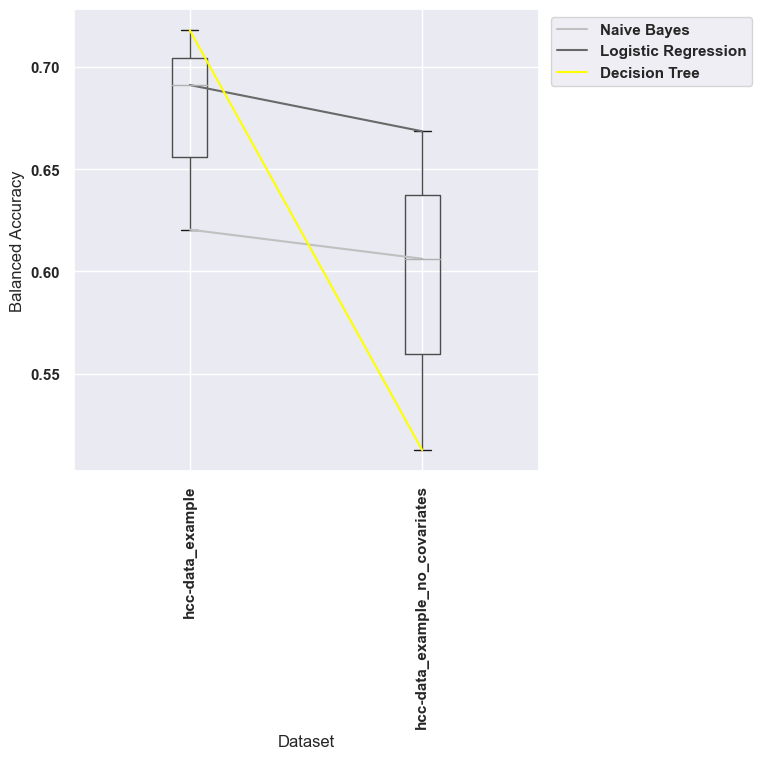

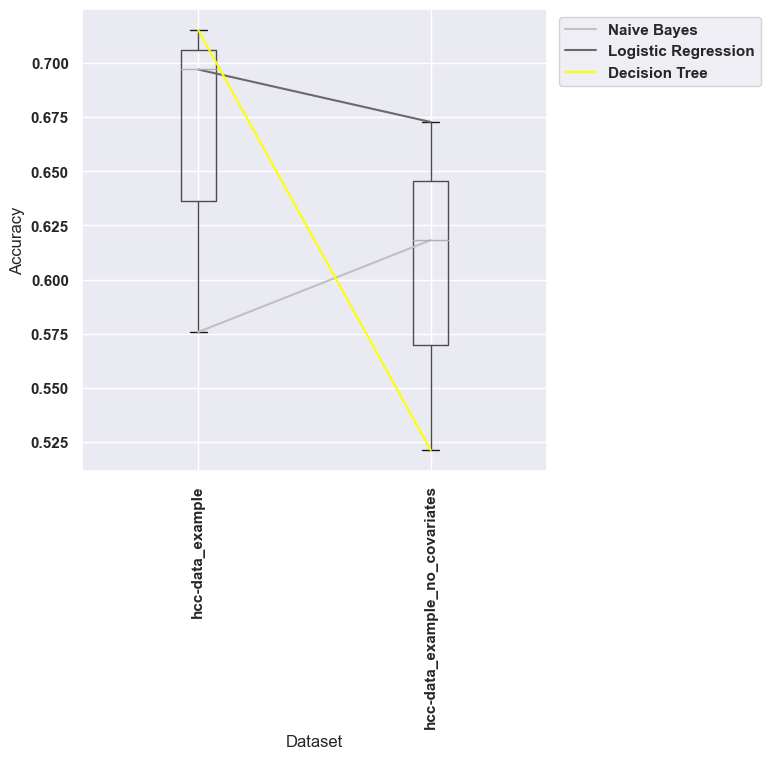

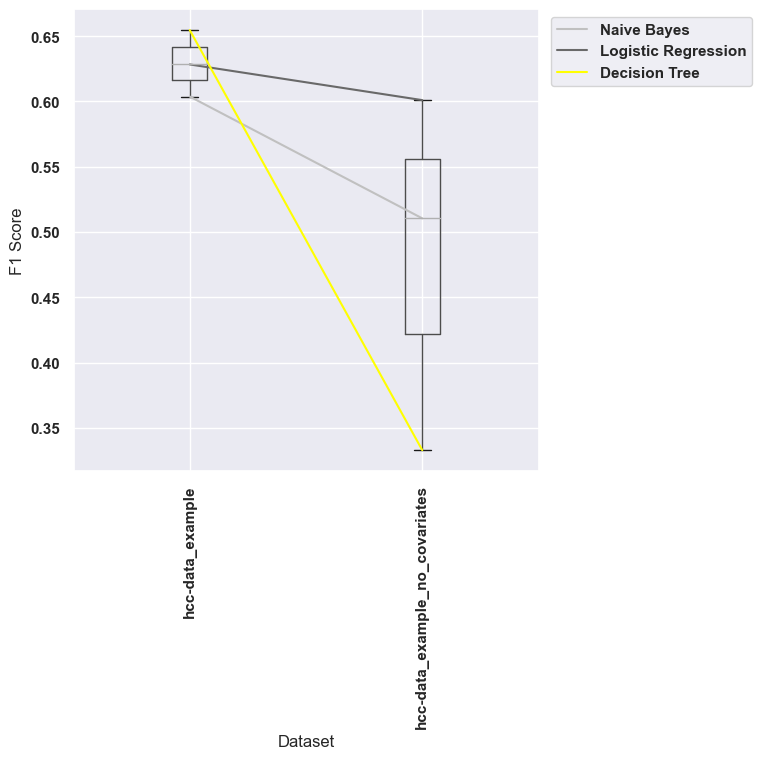

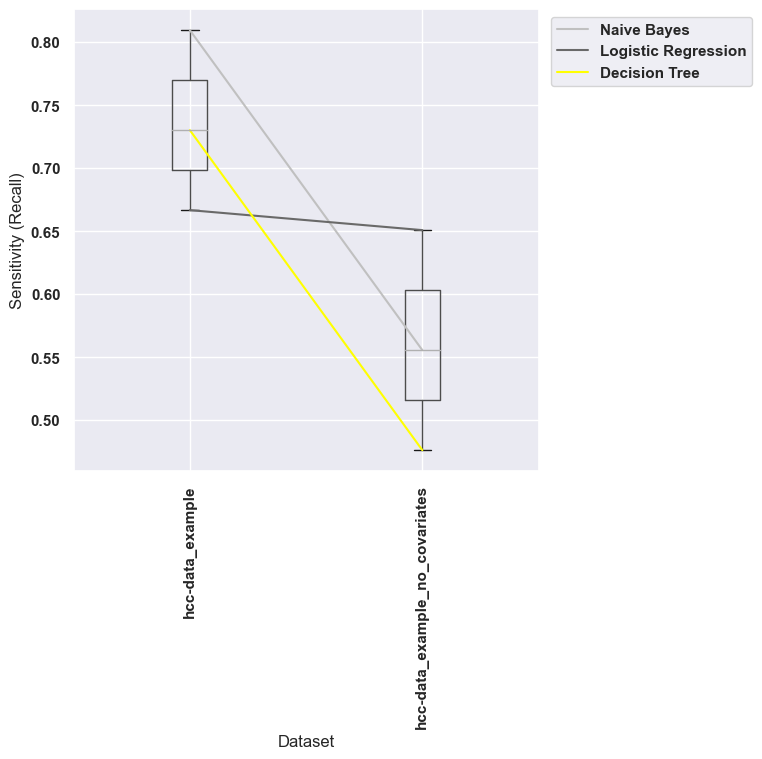

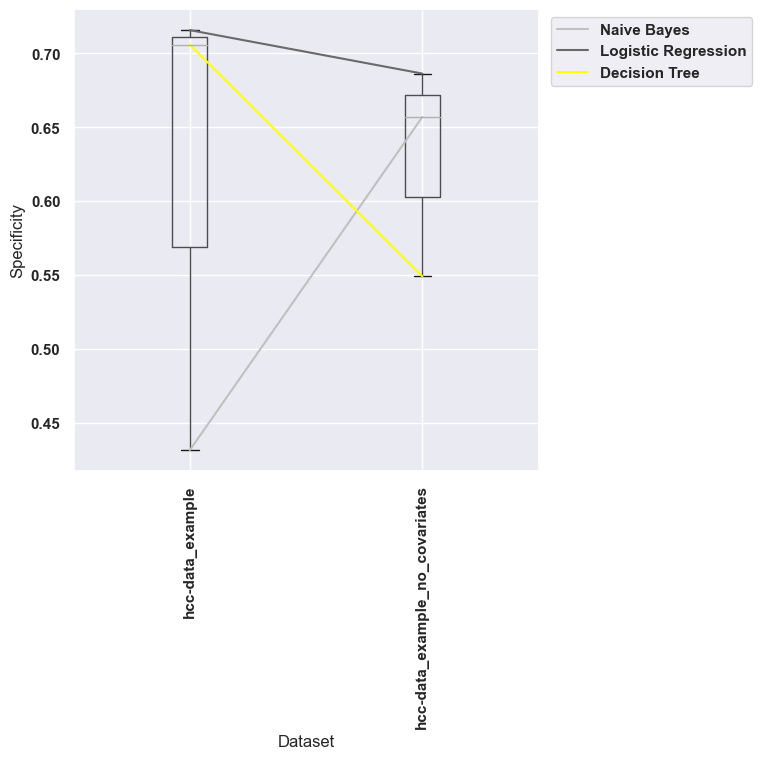

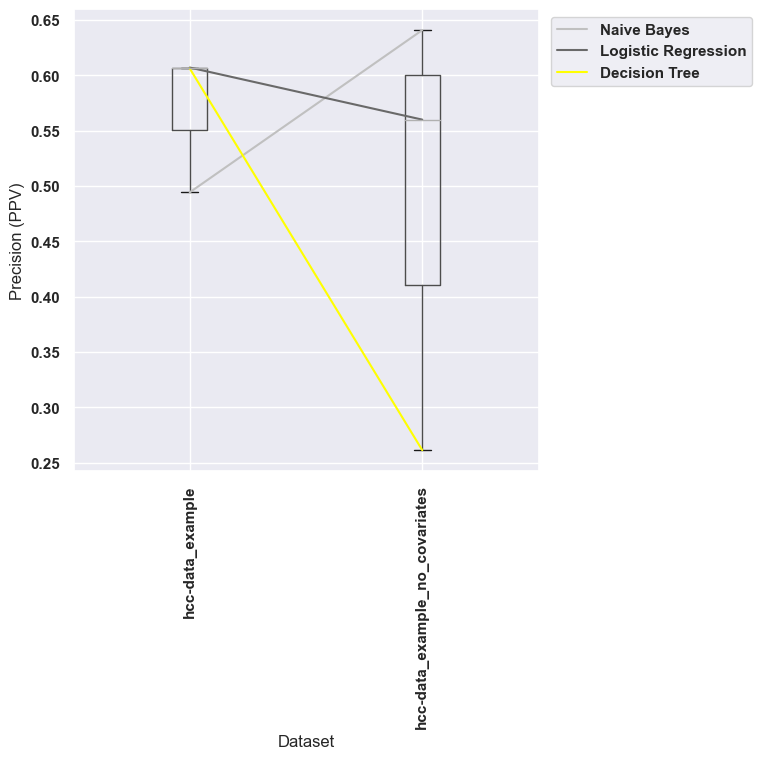

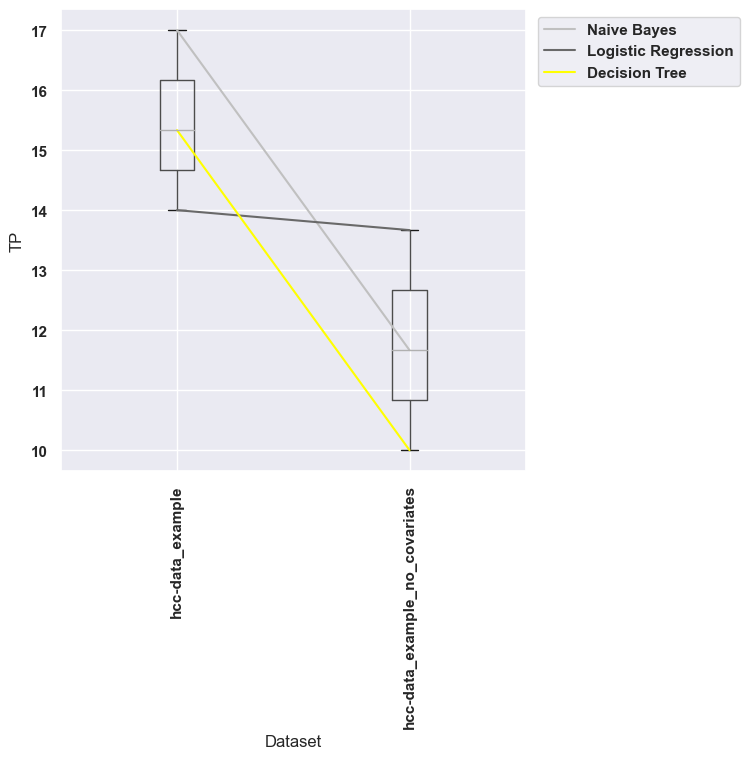

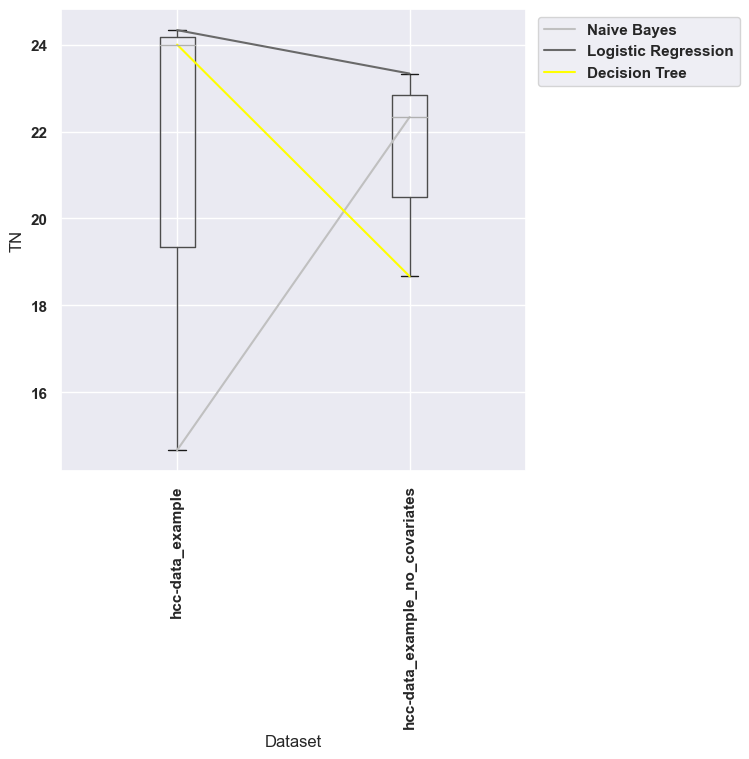

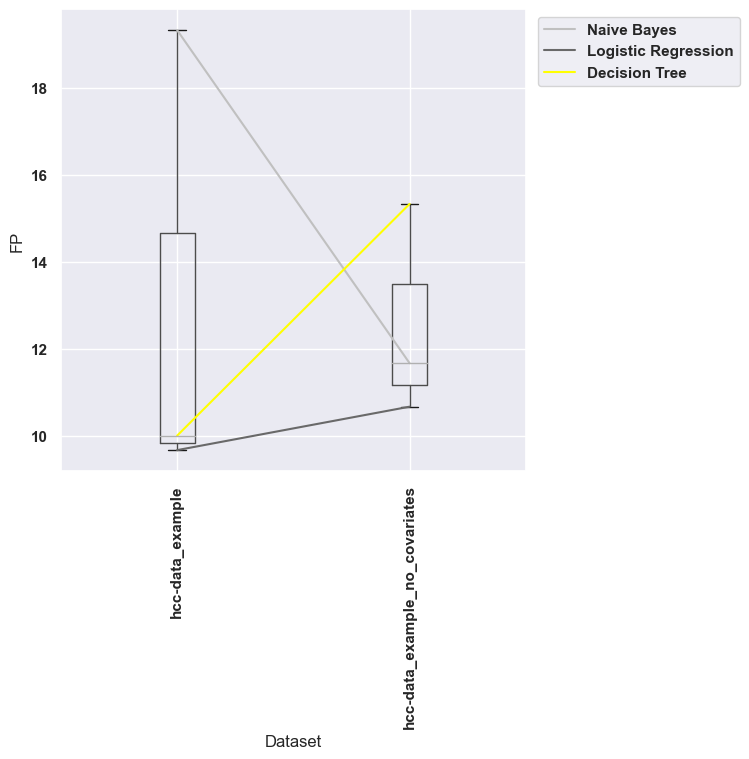

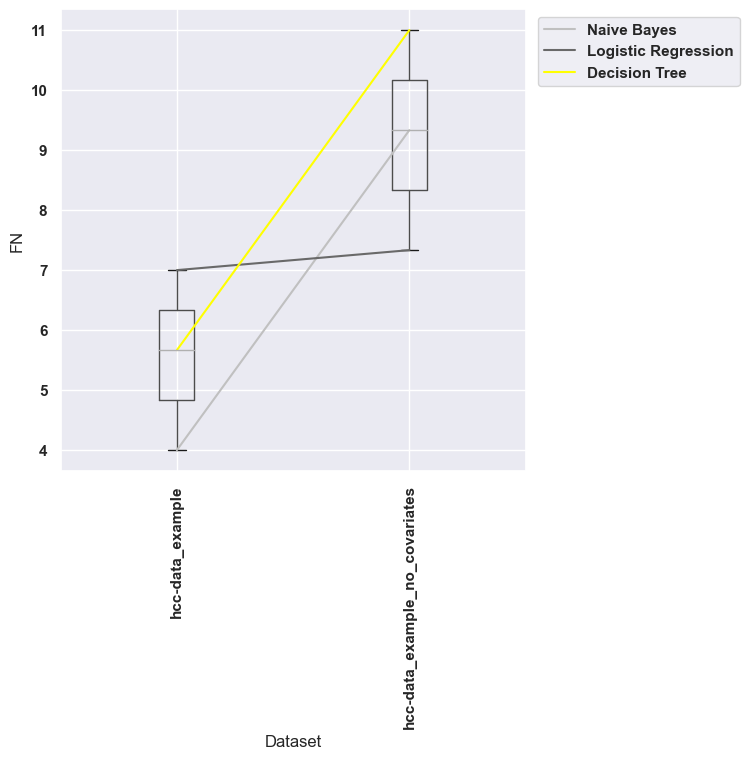

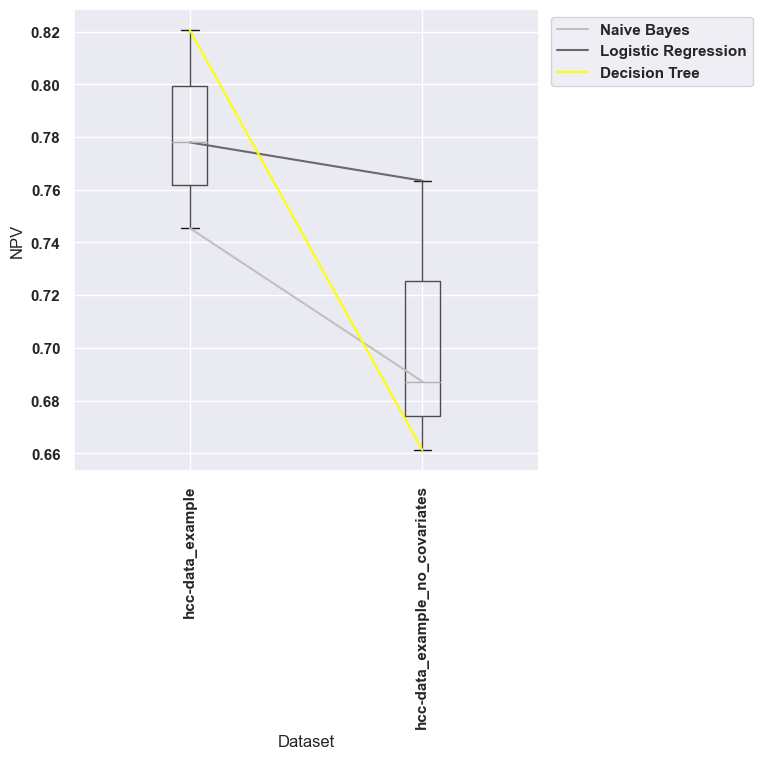

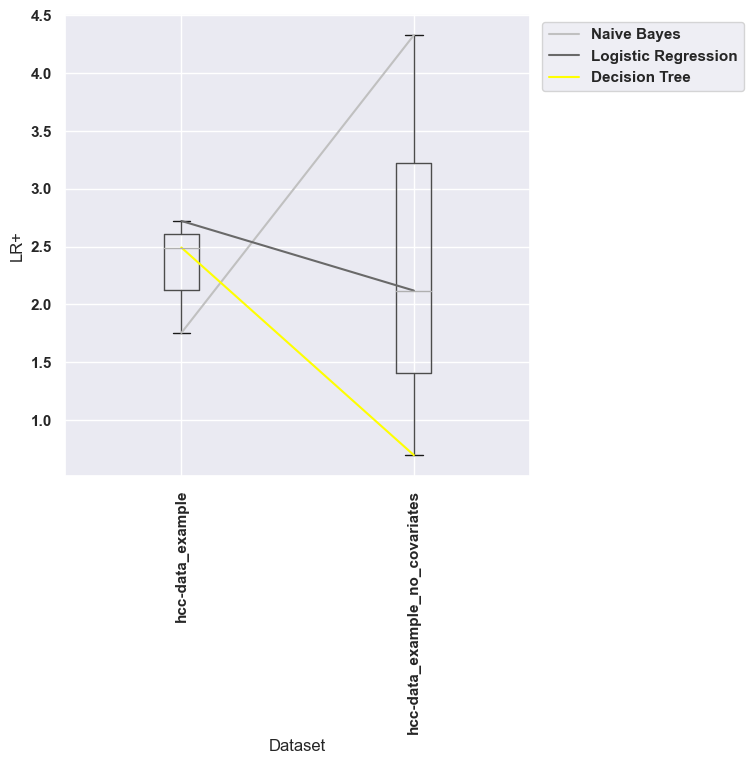

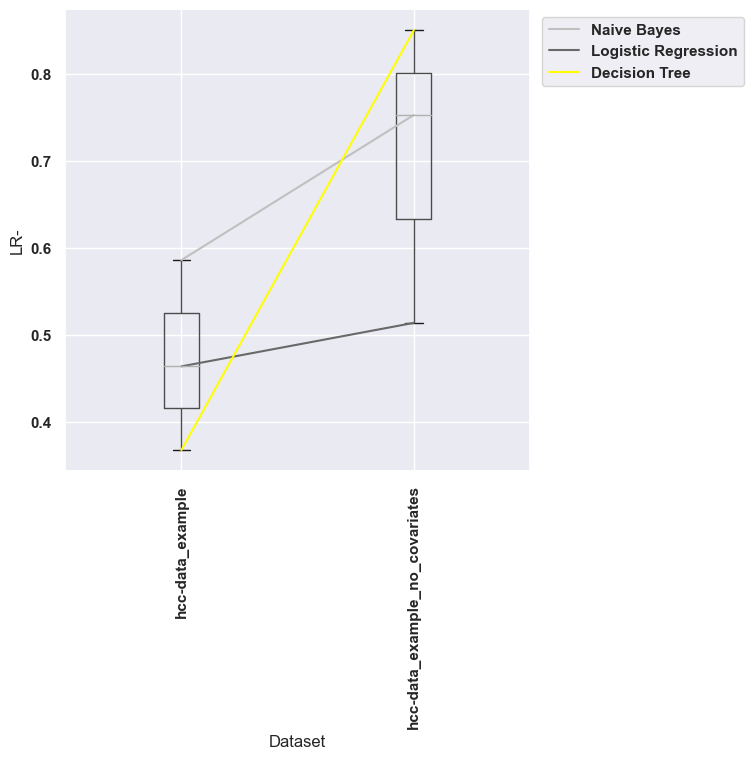

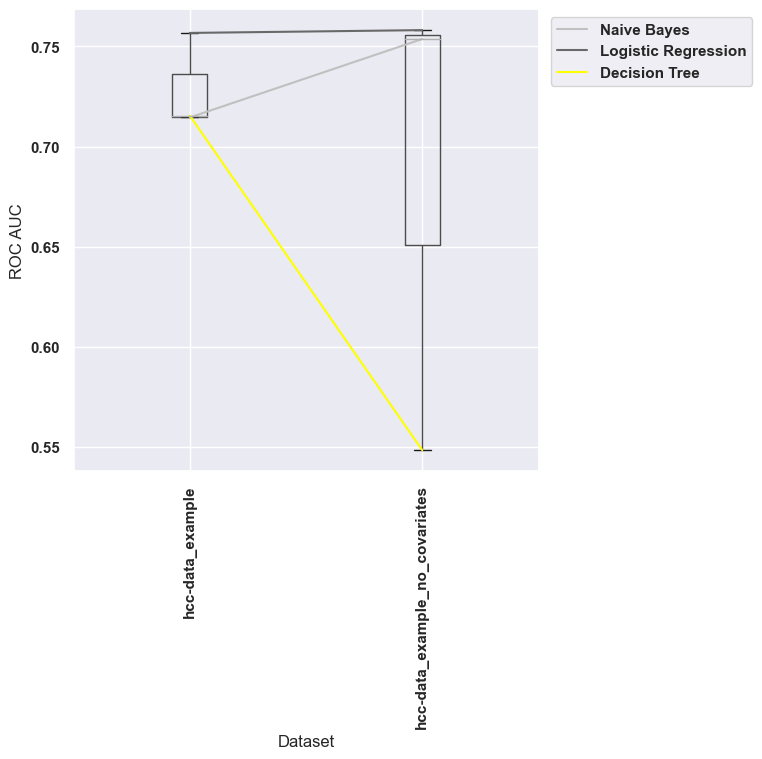

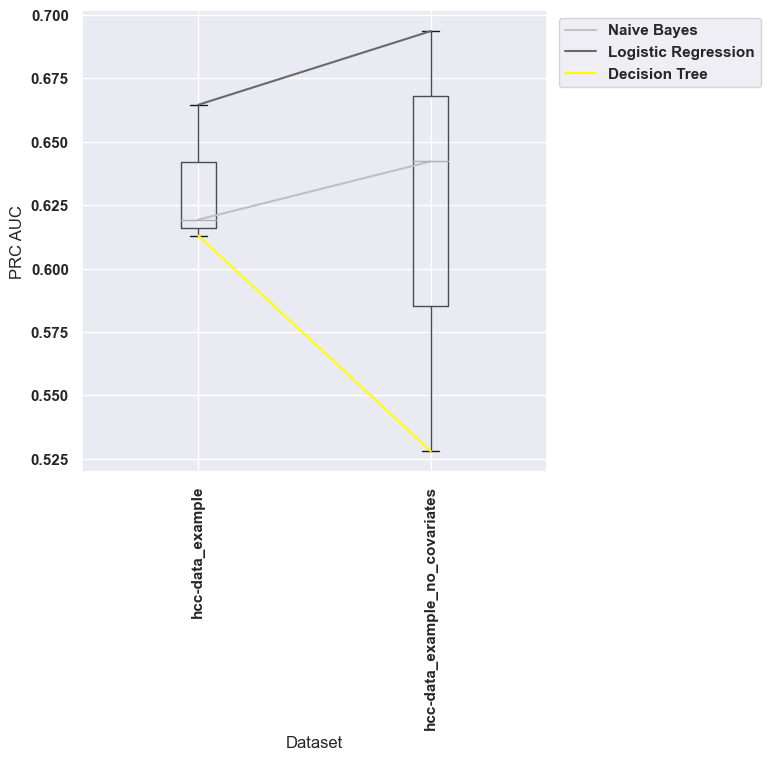

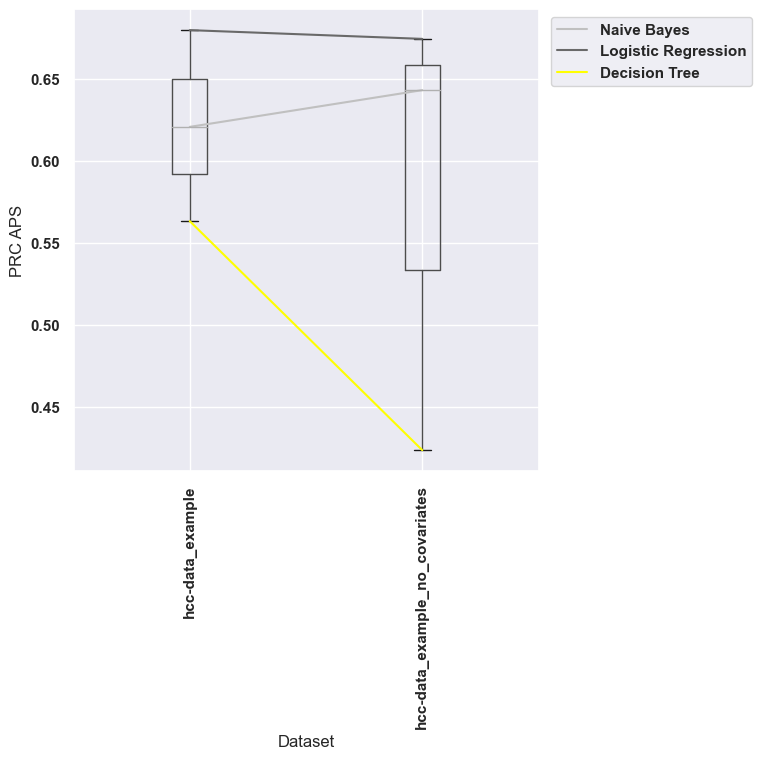

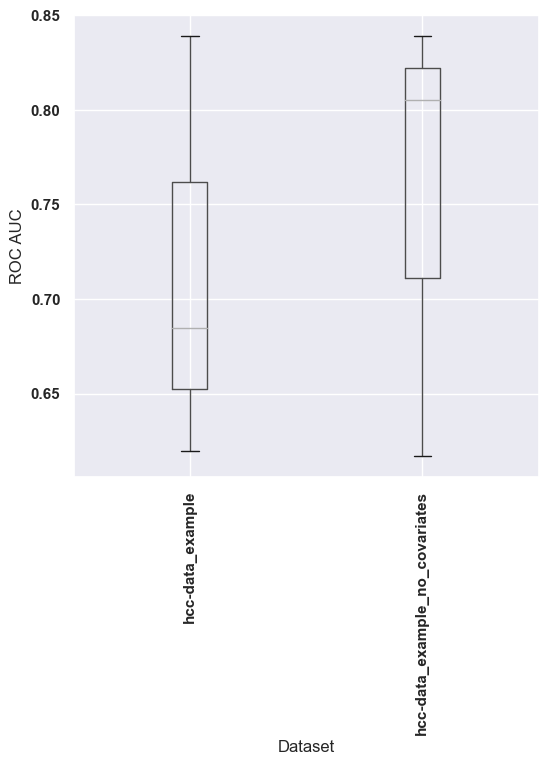

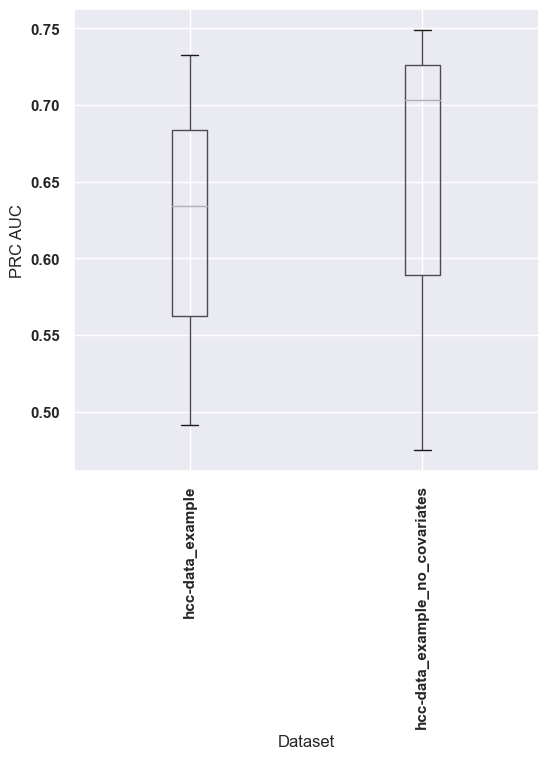

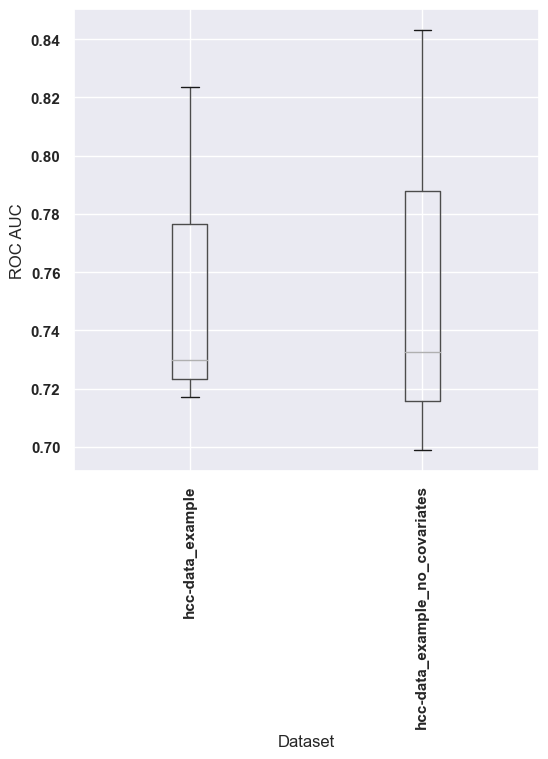

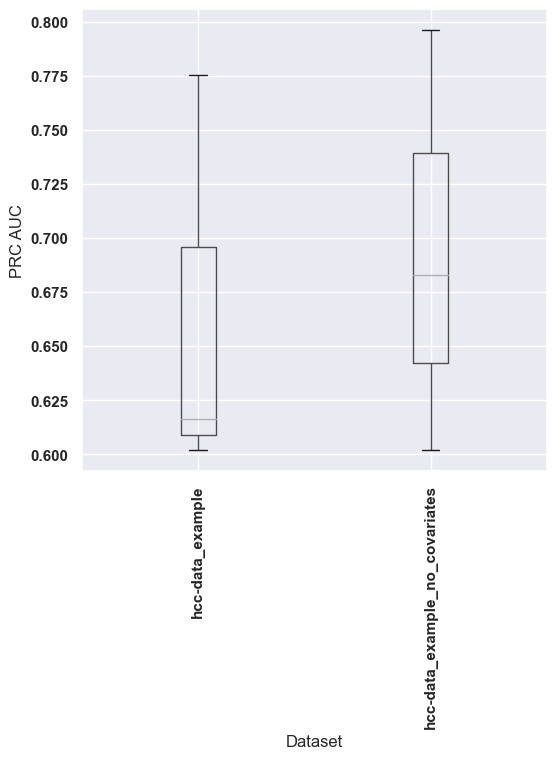

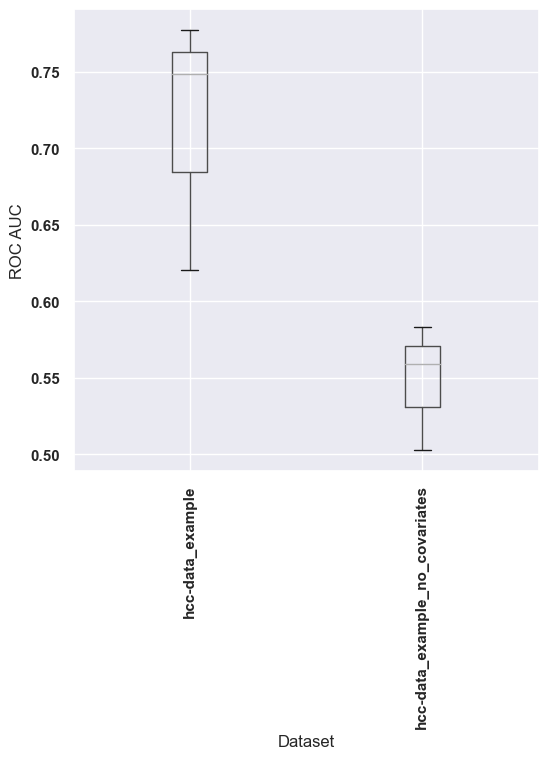

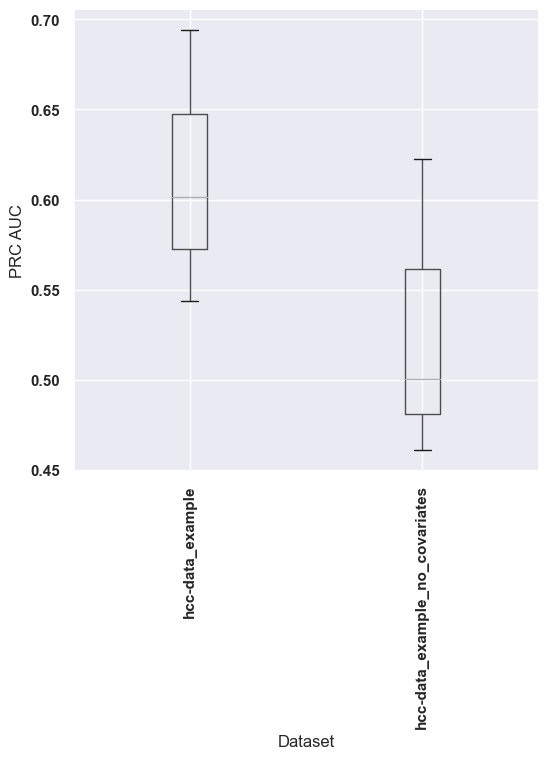

INFO: Phase 7 complete


In [21]:
from streamline.runners.compare_runner import CompareRunner
if len_datasets(output_path, experiment_name) > 1:
    cmp = CompareRunner(output_path, experiment_name, algorithms=algorithms,
                        exclude=exclude, sig_cutoff=sig_cutoff,
                        class_label=class_label, instance_label=instance_label,
                        show_plots=True)
    cmp.run(run_parallel=False)

## Phase 8: PDF Training Report Generator (Optional)
Download a PDF report of the analysis

In [22]:
from streamline.runners.report_runner import ReportRunner
rep = ReportRunner(output_path, experiment_name, 
                   algorithms=algorithms, exclude=exclude)
rep.run(run_parallel=False)

INFO: Starting Report
INFO: Publishing Univariate Analysis
INFO: Publishing Model Prediction Summary
INFO: Publishing Average Model Prediction Statistics
INFO: Publishing Median Model Prediction Statistics
INFO: Publishing Feature Importance Summaries
INFO: Publishing Dataset Comparison Boxplots
INFO: Publishing Statistical Analysis
INFO: Publishing Runtime Summary
INFO: Phase 8 complete


## Phase 9: Apply Models to Replication Data (Optional)

In [23]:
applyToReplication = True # (bool, True or False) Leave false unless you have a replication dataset handy to further evaluate/compare all models in uniform manner

In [24]:
wd_path = '.'
rep_data_path = wd_path + '/DemoRepData'
dataset_for_rep = wd_path + '/DemoData/hcc-data_example.csv'
dataset_name = dataset_for_rep.split('/')[-1].split('.')[0]

Uncomment for custom replication dataset

In [25]:
# !mkdir -p mycrepfolder
# %cd mycrepfolder
# from google.colab import files
# uploaded = files.upload()
# %cd ..
# rep_data_path = mycrepfolder
# dataset_for_rep = './mycustomfolder' + input('Train Dataset CSV for Replication Testing')

In [26]:
if applyToReplication:
    from streamline.runners.replicate_runner import ReplicationRunner
    repl = ReplicationRunner(rep_data_path, dataset_for_rep, output_path, 
                             experiment_name, load_algo=True,
                             export_feature_correlations=True, 
                             plot_roc=True, plot_prc=True, plot_metric_boxplots=True)
    repl.run(run_parallel=False)

INFO: Loading Dataset: hcc-data_example_rep
INFO: Loading Dataset: hcc-data_example
INFO: Data Counts: ----------------
INFO: Instance Count = 165
INFO: Feature Count = 54
INFO:     Categorical  = 32
INFO:     Quantitative = 22
INFO: Missing Count = 826
INFO:     Missing Percent = 0.09270482603815937
INFO: Class Counts: ----------------
INFO: Class Count Information0    102
1     63
Name: Class, dtype: int64
INFO: Running stats on Logistic Regression
INFO: Running stats on Naive Bayes
INFO: Running stats on Decision Tree


hcc-data_example_rep phase 9 complete


## Phase 10: PDF Apply Report Generator (Optional)

In [27]:
if applyToReplication:
    from streamline.runners.report_runner import ReportRunner
    rep = ReportRunner(output_path=output_path, experiment_name=experiment_name,
                       algorithms=algorithms, exclude=exclude, training=False, 
                       rep_data_path=rep_data_path, 
                       dataset_for_rep=dataset_for_rep)
    rep.run(run_parallel=False)

INFO: Starting Report
INFO: Publishing Model Prediction Summary
INFO: Publishing Average Model Prediction Statistics
INFO: Publishing Median Model Prediction Statistics
INFO: Phase 10 complete


## Phase 11: File Cleanup (Optional)

In [28]:
del_time = True  # (bool, True or False) Delete individual run-time files (but save summary)
del_old_cv = True # (bool, True or False) Delete any of the older versions of CV training and testing datasets not overwritten (preserves final training and testing datasets)

In [29]:
from streamline.runners.clean_runner import CleanRunner
clean = CleanRunner(output_path, experiment_name, del_time=del_time, del_old_cv=del_old_cv)
# run_parallel is not used in clean
clean.run()